# Лекция 1. Символьные вычисления, представление выражений

### Подключаем библиотеки, display и Math для визуализации формул, numpy - для построения графиков (понадобится позже)

In [1]:
from IPython.display import display, Math
import numpy as np

### Определяем функцию для создания узла дерева для хранения целых чисел

In [2]:
def integer_(x: int) -> tuple:
  """
    Создает узел дерева для хранения целого числа.

    Параметры:
    x (int): Целое число, которое будет храниться в узле.

    Возвращает:
    tuple: Кортеж, представляющий узел дерева. Первый элемент кортежа - строка 'integer',
           второй элемент - словарь с ключом 'value', содержащим переданное целое число.
    """
  return 'integer', {'value': x}

a = integer_(-34)
a

('integer', {'value': -34})

### Определите функции для доступа к компонентам узла дерева выражения:
* ID(x) - возвращает идентификатор узла
* items(x) - возвращает список дочерних узлов
* options(x) - возвращает словарь с параметрами узла
* isTerminal(x) - возвращает True, если узел --- лист, т.е. не содержит дочерних узлов

*Замените ... в каждой функции на нужное выражение*

In [3]:
def ID(x: tuple) -> str:
  return x[0]

def items(x: tuple) -> list:
  return x[1:-1]

def options(x: tuple) -> dict:
  return x[-1]

def isTerminal(x: tuple) -> bool:
  return len(x)==2

ID(a), items(a), options(a), isTerminal(a)

('integer', (), {'value': -34}, True)

### Определяем функции для преобразования узла в LaTeX-выражение

In [4]:
def latex_(x: tuple) -> str:
  cmd = eval(f"latex_{ID(x)}")
  return cmd(x)

def latex_integer(x: tuple) -> str:
  return f"{options(x)['value']}"

latex_(a)

'-34'

### Определяем функцию show_ для визуализации формулы, представленной деревом x

In [5]:
def show_(x: tuple) -> None:
  display(Math(latex_(x)))

show_(integer_(-123))
print(-123)

<IPython.core.display.Math object>

-123


### Символы
* определяем функцию для генерации узла дерева: дополните список греческих букв, см. [ссылку](https://www.overleaf.com/learn/latex/List_of_Greek_letters_and_math_symbols)
* определяем функцию преобразования символа в LaTeX-формат
* тестируем обе функции

In [6]:
def symbol_(x: str) -> tuple:
  greek = ['alpha', 'beta', 'gamma']
  n, s = x.split('_') if '_' in x else (x, '')
  if n in greek:
    n = f"\\{n}"
  if s:
    n = f"{n}_{{{s}}}"
  return 'symbol', {'name': x, 'latex': n}

def latex_symbol(x: tuple) -> str:
  return options(x)['latex']

x, alpha = symbol_('x_1'), symbol_('alpha')
show_(x)
show_(alpha)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Определяем функции генерации узлов для бинарных и унарных операций
* напишите по аналогии с функцией add_ функции для остальных бинарных операций: вычитания (sub), умножения (mul), деления (div), возведения в степень (deg); логических операций (and, or, xor); операций сравнения (eq, ne, lt, le, gt, ge)
* напишите по аналогии с функцией neg_ функцию для логического отрицания (inv)

In [7]:
def add_(x: tuple, y: tuple) -> tuple:
  return 'add', x, y, {}

def sub_(x: tuple, y: tuple) -> tuple:
  return 'sub', x, y, {}

def mul_(x: tuple, y: tuple) -> tuple:
  return 'mul', x, y, {}

def div_(x: tuple, y: tuple) -> tuple:
  return 'div', x, y, {}

def deg_(x: tuple, y: tuple) -> tuple:
  return 'deg', x, y, {}

def and_(x: tuple, y: tuple) -> tuple:
  return 'and', x, y, {}

def or_(x: tuple, y: tuple) -> tuple:
  return 'or', x, y, {}

def xor_(x: tuple, y: tuple) -> tuple:
  return 'xor', x, y, {}

def eq_(x: tuple, y: tuple) -> tuple:
  return 'eq', x, y, {}

def ne_(x: tuple, y: tuple) -> tuple:
  return 'ne', x, y, {}

def lt_(x: tuple, y: tuple) -> tuple:
  return 'lt', x, y, {}

def le_(x: tuple, y: tuple) -> tuple:
  return 'le', x, y, {}

def gt_(x: tuple, y: tuple) -> tuple:
  return 'gt', x, y, {}

def ge_(x: tuple, y: tuple) -> tuple:
  return 'ge', x, y, {}

def neg_(x: tuple) -> tuple:
  return 'neg', x, {}

def inv_(x: tuple) -> tuple:
  return 'inv', x, {}

### Тестируем операции
* создаем целое число a=34 и символы $x$ и $y$
* создаем дерево выражения f=(a+x)*y, используя вышенаписанные функции для бинарных операций
* печатаем это выражение (print)

In [8]:
a = integer_(34)
x = symbol_("x")
y = symbol_("y")
f = mul_(add_(a, x), y)
print(f)

('mul', ('add', ('integer', {'value': 34}), ('symbol', {'name': 'x', 'latex': 'x'}), {}), ('symbol', {'name': 'y', 'latex': 'y'}), {})


### Создаем словарь с приоритетами всех операций
* в соответствии с приоритетами этих же операций в языке Python: см. [ссылку](https://www.programiz.com/python-programming/precedence-associativity), приоритет логических операций and, or, xor определяется как для побитовых (bitwise) операций (&, |, ^)
* конкретные значения приоритетов не важны, важны их относительные значения
* создаем функцию для вычисления приоритета заданного узла
* найдите приоритет выражения (a+x)*y из предыдущего пункта

In [9]:
# Словарь с приоритетами операций
priority = {
    'deg': 9,  # Возведение в степень
    'inv': 8,  # Логическое отрицание
    'neg': 8,  # Унарное отрицание
    'mul': 7,  # Умножение
    'div': 7,  # Деление
    'add': 6,  # Сложение
    'sub': 6,  # Вычитание
    'and': 5,  # Логическое И (аналог побитового &)
    'xor': 4,  # Логическое ИСКЛЮЧАЮЩЕЕ ИЛИ (аналог побитового ^)
    'or': 3,   # Логическое ИЛИ (аналог побитового |)
    'eq': 2,   # Равно
    'ne': 2,   # Не равно
    'lt': 2,   # Меньше
    'le': 2,   # Меньше или равно
    'gt': 2,   # Больше
    'ge': 2    # Больше или равно
}

def Pr(x: tuple) -> int:
  """
    Возвращает приоритет операции, используя словарь приоритетов.

    Аргументы:
    x (tuple): Кортеж, представляющий узел операции.

    Возвращает:
    int: Приоритет операции. Если операция не найдена в словаре, возвращается значение по умолчанию (10).
    """
  return priority.get(ID(x), 10)

print(Pr(f))

7


### Определяем функцию "оборачивания" заданного LaTeX-выражения в круглые скобки "адаптивного" размера

Сравните размер скобок: `(\frac{x^2}{y^3})` $\to (\frac{x^2}{y^3})$ и `\left(\frac{x^2}{y^3}\right)` $\to \left(\frac{x^2}{y^3}\right)$

In [10]:
def enclose(x: str) -> str:
  """
    Оборачивает строку в LaTeX-скобки.

    Аргументы:
    x (str): Строка, которую нужно обернуть в скобки.

    Возвращает:
    str: Строка, обернутая в LaTeX-скобки.
    """
  return f"\\left( {x} \\right)"

### Определяем функции преобразования всех введенных бинарных и унарных операций в формат LaTeX
* отдельным образом определяются операции возведения в степень $x^y$ и деления $\frac{x}{y}$
* для логических операций используем обозначения $\neg x$, $x \wedge y$, $x \vee y$, $x \oplus y$
* чтобы посмотреть код этой вкладки, сделайте ЗДЕСЬ двойной клик

In [11]:
def latex_add(x: tuple) -> str:
  """
    Преобразует узел операции сложения в LaTeX-формат.

    Аргументы:
    x (tuple): Кортеж, представляющий узел операции сложения.

    Возвращает:
    str: Строка в LaTeX-формате, представляющая сложение.
    """
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{a} + {b}"

def latex_sub(x: tuple) -> str:
  """
    Преобразует узел операции вычитания в LaTeX-формат.

    Аргументы:
    x (tuple): Кортеж, представляющий узел операции вычитания.

    Возвращает:
    str: Строка в LaTeX-формате, представляющая вычитание.
    """
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
      a = enclose(a)
  if Pr(x[2]) <= Pr(x):
      b = enclose(b)
  return f"{a} - {b}"

def latex_mul(x: tuple) -> str:
  """
    Преобразует узел операции умножения в LaTeX-формат.

    Аргументы:
    x (tuple): Кортеж, представляющий узел операции умножения.

    Возвращает:
    str: Строка в LaTeX-формате, представляющая умножение.
    """
  op, a, b = ID(x), latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{a} \\cdot {b}"

def latex_div(x: tuple) -> str:
  """
    Преобразует узел операции деления в LaTeX-формат.

    Аргументы:
    x (tuple): Кортеж, представляющий узел операции деления.

    Возвращает:
    str: Строка в LaTeX-формате, представляющая деление.
    """
  op, a, b = ID(x), latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"\\frac{{{a}}}{{{b}}}"

def latex_deg(x: tuple) -> str:
  """
    Преобразует узел операции возведения в степень в LaTeX-формат.

    Аргументы:
    x (tuple): Кортеж, представляющий узел операции возведения в степень.

    Возвращает:
    str: Строка в LaTeX-формате, представляющая возведение в степень.
    """
  op, a, b = ID(x), latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{a}^{{{b}}}"

def latex_neg(x: tuple) -> str:
  """
    Преобразует узел операции отрицания в LaTeX-формат.

    Аргументы:
    x (tuple): Кортеж, представляющий узел операции отрицания.

    Возвращает:
    str: Строка в LaTeX-формате, представляющая отрицание.
    """
  a = latex_(x[1])
  return f"-{a}"

def latex_inv(x: tuple) -> str:
  """
    Преобразует узел операции логического отрицания в LaTeX-формат.

    Аргументы:
    x (tuple): Кортеж, представляющий узел операции логического отрицания.

    Возвращает:
    str: Строка в LaTeX-формате, представляющая логическое отрицание.
    """
  a = latex_(x[1])
  return f"\\neg {a}"

def latex_and(x: tuple) -> str:
  """
    Преобразует узел операции логического И в LaTeX-формат.

    Аргументы:
    x (tuple): Кортеж, представляющий узел операции логического И.

    Возвращает:
    str: Строка в LaTeX-формате, представляющая логическое И.
    """
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
      a = enclose(a)
  if Pr(x[2]) <= Pr(x):
      b = enclose(b)
  return f"{a} \\wedge {b}"

def latex_or(x: tuple) -> str:
  """
    Преобразует узел операции логического ИЛИ в LaTeX-формат.

    Аргументы:
    x (tuple): Кортеж, представляющий узел операции логического ИЛИ.

    Возвращает:
    str: Строка в LaTeX-формате, представляющая логическое ИЛИ.
    """
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
      a = enclose(a)
  if Pr(x[2]) <= Pr(x):
      b = enclose(b)
  return f"{a} \\vee {b}"

def latex_xor(x: tuple) -> str:
  """
    Преобразует узел операции логического ИСКЛЮЧАЮЩЕГО ИЛИ в LaTeX-формат.

    Аргументы:
    x (tuple): Кортеж, представляющий узел операции логического ИСКЛЮЧАЮЩЕГО ИЛИ.

    Возвращает:
    str: Строка в LaTeX-формате, представляющая логическое ИСКЛЮЧАЮЩЕЕ ИЛИ.
    """
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
      a = enclose(a)
  if Pr(x[2]) <= Pr(x):
      b = enclose(b)
  return f"{a} \\oplus {b}"

def latex_eq(x: tuple) -> str:
  """
    Преобразует узел операции сравнения 'равно' в LaTeX-формат.

    Аргументы:
    x (tuple): Кортеж, представляющий узел операции сравнения 'равно'.

    Возвращает:
    str: Строка в LaTeX-формате, представляющая сравнение 'равно'.
    """
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
      a = enclose(a)
  if Pr(x[2]) <= Pr(x):
      b = enclose(b)
  return f"{a} = {b}"

def latex_ne(x: tuple) -> str:
  """
    Преобразует узел операции сравнения 'не равно' в LaTeX-формат.

    Аргументы:
    x (tuple): Кортеж, представляющий узел операции сравнения 'не равно'.

    Возвращает:
    str: Строка в LaTeX-формате, представляющая сравнение 'не равно'.
    """
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
      a = enclose(a)
  if Pr(x[2]) <= Pr(x):
      b = enclose(b)
  return f"{a} \\neq {b}"

def latex_lt(x: tuple) -> str:
  """
    Преобразует узел операции сравнения 'меньше' в LaTeX-формат.

    Аргументы:
    x (tuple): Кортеж, представляющий узел операции сравнения 'меньше'.

    Возвращает:
    str: Строка в LaTeX-формате, представляющая сравнение 'меньше'.
    """
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
      a = enclose(a)
  if Pr(x[2]) <= Pr(x):
      b = enclose(b)
  return f"{a} < {b}"

def latex_le(x: tuple) -> str:
  """
    Преобразует узел операции сравнения 'меньше или равно' в LaTeX-формат.

    Аргументы:
    x (tuple): Кортеж, представляющий узел операции сравнения 'меньше или равно'.

    Возвращает:
    str: Строка в LaTeX-формате, представляющая сравнение 'меньше или равно'.
    """
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
      a = enclose(a)
  if Pr(x[2]) <= Pr(x):
      b = enclose(b)
  return f"{a} \\leq {b}"

def latex_gt(x: tuple) -> str:
  """
    Преобразует узел операции сравнения 'больше' в LaTeX-формат.

    Аргументы:
    x (tuple): Кортеж, представляющий узел операции сравнения 'больше'.

    Возвращает:
    str: Строка в LaTeX-формате, представляющая сравнение 'больше'.
    """
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
      a = enclose(a)
  if Pr(x[2]) <= Pr(x):
      b = enclose(b)
  return f"{a} > {b}"

def latex_ge(x: tuple) -> str:
  """
    Преобразует узел операции сравнения 'больше или равно' в LaTeX-формат.

    Аргументы:
    x (tuple): Кортеж, представляющий узел операции сравнения 'больше или равно'.

    Возвращает:
    str: Строка в LaTeX-формате, представляющая сравнение 'больше или равно'.
    """
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
      a = enclose(a)
  if Pr(x[2]) <= Pr(x):
      b = enclose(b)
  return f"{a} \\geq {b}"

### Протестируйте определенные функции на различных выражениях
* опциональное (бонусное) задание: проверьте как работают построенные функции на выражениях с унарным минусом и отрицательными числами, придумайте решение найденных проблем (если проблемы не найдены, то задание не засчитывается!)

In [12]:
print(latex_mul(mul_(x, y)))
print(latex_div(div_(x, y)))
print(latex_deg(deg_(x, y)))  
print(latex_inv(inv_(x)))
print(latex_sub(sub_(x, y)))  
print(latex_and(and_(x, y)))
print(latex_xor(xor_(x, y)))
print(latex_or(or_(x, y)))
print(latex_eq(eq_(x, y)))    
print(latex_ne(ne_(x, y)))
print(latex_lt(lt_(x, y)))    
print(latex_le(le_(x, y)))
print(latex_gt(gt_(x, y)))    
print(latex_ge(ge_(x, y)))

x \cdot y
\frac{x}{y}
x^{y}
\neg x
x - y
x \wedge y
x \oplus y
x \vee y
x = y
x \neq y
x < y
x \leq y
x > y
x \geq y


### Определяем класс Expression - обертку для списочных выражений
* включите в него перегрузку всех необходимых бинарных и унарных операций
* определяем функцию fix для принудительного приведения заданного целого числа к объекту класса Expression
* опциональное (бонусное) задание: включите перегрузку тех же бинарных операций с "правым" аргументом (radd, rmul и т.д.)


In [13]:
class Expression:
    """
        Класс Expression представляет математическое выражение и позволяет перегружать
        бинарные и унарные операции для удобного создания и манипулирования выражениями.

        Атрибуты:
        T (tuple): Узел выражения, представляющий математическое выражение.
        """
    def __init__(self, x):
        self.T = x
        
    def __hash__(self):
        return hash(str(self.T))

    def __add__(self, x):
        return Expression(add_(self.T, fix(x).T))

    def __sub__(self, x):
        return Expression(sub_(self.T, fix(x).T))

    def __mul__(self, x):
        return Expression(mul_(self.T, fix(x).T))

    def __truediv__(self, x):
        return Expression(div_(self.T, fix(x).T))

    def __pow__(self, x):
        return Expression(deg_(self.T, fix(x).T))

    def __neg__(self):
        return Expression(neg_(self.T))

    def __invert__(self):
        return Expression(inv_(self.T))

    def __and__(self, x):
        return Expression(and_(self.T, fix(x).T))

    def __or__(self, x):
        return Expression(or_(self.T, fix(x).T))

    def __xor__(self, x):
        return Expression(xor_(self.T, fix(x).T))

    def __eq__(self, x):
        return Expression(eq_(self.T, fix(x).T))

    def __ne__(self, x):
        return Expression(ne_(self.T, fix(x).T))

    def __lt__(self, x):
        return Expression(lt_(self.T, fix(x).T))

    def __le__(self, x):
        return Expression(le_(self.T, fix(x).T))

    def __gt__(self, x):
        return Expression(gt_(self.T, fix(x).T))

    def __ge__(self, x):
        return Expression(ge_(self.T, fix(x).T))

    # Перегрузка операций с "правым" аргументом
    def __radd__(self, x):
        return Expression(add_(fix(x).T, self.T))

    def __rsub__(self, x):
        return Expression(sub_(fix(x).T, self.T))

    def __rmul__(self, x):
        return Expression(mul_(fix(x).T, self.T))

    def __rtruediv__(self, x):
        return Expression(div_(fix(x).T, self.T))

    def __rpow__(self, x):
        return Expression(deg_(fix(x).T, self.T))

    def __rand__(self, x):
        return Expression(and_(fix(x).T, self.T))

    def __ror__(self, x):
        return Expression(or_(fix(x).T, self.T))

    def __rxor__(self, x):
        return Expression(xor_(fix(x).T, self.T))

    def __req__(self, x):
        return Expression(eq_(fix(x).T, self.T))

    def __rne__(self, x):
        return Expression(ne_(fix(x).T, self.T))

    def __rlt__(self, x):
        return Expression(lt_(fix(x).T, self.T))

    def __rle__(self, x):
        return Expression(le_(fix(x).T, self.T))

    def __rgt__(self, x):
        return Expression(gt_(fix(x).T, self.T))

    def __rge__(self, x):
        return Expression(ge_(fix(x).T, self.T))
    


    def __hash__(self):
        return hash(str(self.T))

def fix(x):
    """
        Приводит заданный аргумент к объекту класса Expression, если он является целым числом.

        Аргументы:
        x: Аргумент, который может быть целым числом или уже объектом Expression.

        Возвращает:
        Expression: Объект класса Expression, соответствующий входному аргументу.
        """
    if isinstance(x, int):
        return Expression(integer_(x))
    return x

### Создаем обертки для функций integer_  и symbol_
* опциональное (бонусное) задание: напишите функцию symbols, которая позволяет создавать сразу несколько символьных переменных: `x, y, z = symbols('x y z')`

In [14]:
def Z(x: int) -> Expression:
  """
    Создает объект Expression для целого числа.

    Аргументы:
    x (int): Целое число.

    Возвращает:
    Expression: Объект Expression, представляющий целое число.
    """
  return Expression(integer_(x))

def symbol(x: str) -> Expression:
  """
    Создает объект Expression для символьной переменной.

    Аргументы:
    x (str): Строка, представляющая символьную переменную.

    Возвращает:
    Expression: Объект Expression, представляющий символьную переменную.
    """
  return Expression(symbol_(x))

def symbols(*args: str) -> list:
    """
      Создает несколько объектов Expression для символьных переменных.

      Аргументы:
      *args (str): Строки, представляющие символьные переменные. Если передана одна строка, она будет разделена по пробелам.

      Возвращает:
      list: Список объектов Expression, представляющих символьные переменные.
      """
    if len(args) == 1:
        args = args[0].split()
    return [symbol(arg) for arg in args]

### Определяем функцию show вывода выражений, заданных классом Expression
* протестируйте работу всех функций на различных выражениях

In [15]:
def show(x: Expression) -> None:
    """
        Отображает LaTeX-представление выражения.

        Аргументы:
        x (Expression): Объект Expression, представляющий выражение.

        Возвращает:
        None
        """
    show_(x.T)

In [16]:
# Создаем несколько символьных переменных сразу
z, gamma, beta, alpha = symbols('z gamma beta alpha')

# Отображаем символьные переменные
show(z)
show(gamma)
show(beta)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [17]:
a, x = Z(13), symbol('x_2')
show(a / x)
show(a - x)
show(a ** x)
show(x ** a)
show(-x)
show(~x)
show(z & x)
show(z <= x)
show(x >= a)
show(gamma | beta)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [18]:
a, x = Z(13), symbol('x_2')
show(a + x ** beta / z >= (gamma / alpha) - a)

<IPython.core.display.Math object>

### Визуализация дерева выражения
Дополнительные задания:

* в арифметических узлах должны быть показаны значки операций, а не слова (+ вместо add и т.д.)
* терминальные узлы должны быть выделены отдельным цветом

In [19]:
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
from networkx.readwrite import json_graph

C:\Users\rbany\AppData\Local\Temp\ipykernel_14840\2289970602.py:72: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(graph, prog="dot")


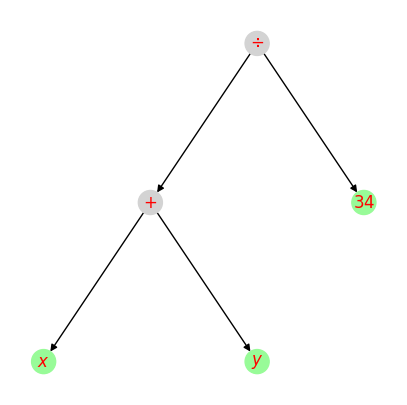

In [20]:
def makeGraph(x: tuple, nodes: list, labels: list, links: list, node_colors: dict) -> int:
  """
    Рекурсивно строит граф выражения.

    Аргументы:
    x (tuple): Узел выражения.
    nodes (list): Список узлов графа.
    labels (list): Список меток узлов.
    links (list): Список связей между узлами.

    Возвращает:
    int: Идентификатор текущего узла.
    """
  id_ = len(nodes)
  nodes.append({'id': id_})
  if isTerminal(x):
    labels[id_] = f'${latex_(x)}$'
    node_colors[id_] = 'PaleGreen'  # Терминальные узлы выделяем зеленым цветом
  else:
    if x[0] == 'add':
            labels[id_] = '+'
    elif x[0] == 'sub':
      labels[id_] = '-'
    elif x[0] == 'mul':
      labels[id_] = '·'
    elif x[0] == 'div':
      labels[id_] = '÷'
    elif x[0] == 'deg':
      labels[id_] = '^'
    elif x[0] == 'neg':
      labels[id_] = '-'
    elif x[0] == 'inv':
        labels[id_] = '¬'
    elif x[0] == 'and':
        labels[id_] = '∧'
    elif x[0] == 'or':
        labels[id_] = '∨'
    elif x[0] == 'xor':
        labels[id_] = '⊕'
    elif x[0] == 'eq':
        labels[id_] = '='
    elif x[0] == 'ne':
        labels[id_] = '≠'
    elif x[0] == 'lt':
        labels[id_] = '<'
    elif x[0] == 'le':
        labels[id_] = '≤'
    elif x[0] == 'gt':
        labels[id_] = '>'
    elif x[0] == 'ge':
        labels[id_] = '≥'
    else:
        labels[id_] = x[0]
    node_colors[id_] = 'LightGray'  # Нетерминальные узлы выделяем серым цветом
    for a in x[1:]:
      if isinstance(a, tuple):
        cid = makeGraph(a, nodes, labels, links, node_colors)
        links.append({'source': id_, 'target': cid})
  return id_

def drawGraph_(x: tuple, size) -> None:
  """
    Визуализирует граф выражения.

    Аргументы:
    x (tuple): Узел выражения.
    size (float): Размер графика.
    """
  nodes, labels, links, node_colors = [], {}, [], {}
  makeGraph(x, nodes, labels, links, node_colors)
  graph = json_graph.node_link_graph({'nodes': nodes, 'links': links}, directed=True, multigraph=False)
  pos = graphviz_layout(graph, prog="dot")
  fig, ax = plt.subplots(figsize=(5 * size, 5 * size))
  ax.set_axis_off()
  nx.draw_networkx_edges(graph.to_directed(), pos, ax = ax, edge_color="black")
  nx.draw_networkx_labels(graph.to_directed(), pos, labels = labels, font_color = "red")
  nx.draw_networkx_nodes(graph.to_directed(), pos, ax=ax, node_color=[node_colors[node['id']] for node in nodes])
  plt.show()

def drawGraph(x: Expression, size: float = 1) -> None:
  drawGraph_(x.T, size)

x, y = symbol('x'), symbol('y')
drawGraph((x + y) / Z(34))

***

# Лекция 2 . Числовые системы

**Задание выполняется в ноутбуке, который был создан при выполнении первого задания!**

### Факторизация

* Напишите функцию `factors(x)`, которая возвращает разложение заданного натурального числа $x$ на простые множители в виде списка этих множителей: factors`(12)` $\to$ `[2, 2, 3]`.

In [ ]:
def factors(x: int) -> list:
    """
        Возвращает разложение заданного натурального числа x на простые множители.

        Аргументы:
        x (int): Натуральное число, которое нужно разложить на простые множители.

        Возвращает:
        list: Список простых множителей числа x.
        """
    
    if x < 1:
        raise ValueError("Число должно быть натуральным (больше 0)")
    
    factors_list = []  # Инициализируем пустой список для хранения множителей
    divisor = 2  # Начинаем с наименьшего простого числа
    
    while x > 1:
        while x % divisor == 0:  # Пока x делится на divisor без остатка
            factors_list.append(divisor)  # Добавляем divisor в список множителей
            x //= divisor  # Делим x на divisor
        divisor += 1  # Переходим к следующему простому числу
    
    return factors_list  # Возвращаем список простых множителей
  
factors(120)

[2, 2, 2, 3, 5]

* Напишите функцию `factorizeInt(x)`, которая преобразует заданное число `x` в произведение простых сомножителей в форме **выражения** (класс `Expression`), повторяющиеся сомножители должны входить в выражение в форме степеней: `factorizeInt(120)` $\to 2^3\cdot 3\cdot 5$.  

In [22]:
def factorizeInt(x: int) -> Expression:
    """
        Преобразует заданное число x в произведение простых сомножителей в форме выражения.

        Аргументы:
        x (int): Натуральное число, которое нужно разложить на простые сомножители.

        Возвращает:
        Expression: Выражение, представляющее произведение простых сомножителей.
        """
    factors_list = factors(x)
    
    # Считаем количество каждого простого множителя
    factor_counts = {}
    for factor in factors_list:
        if factor in factor_counts:
            factor_counts[factor] += 1
        else:
            factor_counts[factor] = 1
            
    # Создаем выражение
    if not factor_counts:
        return Z(1)  # Если число равно 1, возвращаем единицу
    
    # Начинаем с первого множителя
    first_factor, first_count = next(iter(factor_counts.items()))
    if first_count > 1:
        expression = Z(first_factor) ** Z(first_count)
    else:
        expression = Z(first_factor)
    
    # Добавляем остальные множители
    for factor, count in list(factor_counts.items())[1:]:
        if count > 1:
            expression *= Z(factor) ** Z(count)
        else:
            expression *= Z(factor)
    
    return expression


show(factorizeInt(120))

<IPython.core.display.Math object>

### Наибольший общий делитель

* Реализуйте алгоритм Евклида в виде функции `GCD(n, m)`.

In [23]:
def GCD(n: int, m: int) -> int:
    """
      Реализует алгоритм Евклида для нахождения наибольшего общего делителя (НОД) двух чисел.

      Аргументы:
      n (int): Первое число.
      m (int): Второе число.

      Возвращает:
      int: Наибольший общий делитель чисел n и m.
      """
    while m != 0:
        n, m = m, n % m
    return n


GCD(120, 48)

24

### Реализация рациональных чисел

* Создаем функцию-конструктор `rational_(n,m)` узлов для рациональных чисел. В каждом таком узле должно храниться нормализованное представление заданного числа.


In [24]:
def rational_(n: int, m: int) -> tuple:
  """
    Создает узел для рациональных чисел с нормализованным представлением.

    Аргументы:
    n (int): Числитель.
    m (int): Знаменатель.

    Возвращает:
    tuple: Узел рационального числа в формате ('rational', {'num': n, 'denom': m}).
    """
    
  if n == 0:
    m = 1 # нормализованное представление нуля - (0, 1)
  else:
    if m < 0:
      n, m = -n, -m # знаменатель должен быть положительным
    c = GCD(abs(n), m)
    n, m = n // c, m // c # приводим дробь к несократимому виду
  return 'rational', {'num': n, 'denom': m} # num - числитель (numerator), denom - знаменатель (denominator)

* Пишем функцию `Q(n,m)` для создания выражения, представляющего рациональное число $n/m$. Знаменатель `m` по умолчанию равен `1`.


In [25]:
def Q(n: int, m: int = 1) -> Expression:
  """
    Создает выражение, представляющее рациональное число n/m.

    Аргументы:
    n (int): Числитель.
    m (int): Знаменатель (по умолчанию 1).

    Возвращает:
    Expression: Выражение, представляющее рациональное число.
    """
  return Expression(rational_(n, m))

Q(2, -6).T

('rational', {'num': -1, 'denom': 3})

* Напишите функцию `latex_rational(x)`, преобразующую рациональное число $x$ в формат LaTeX. Это преобразование должно учитывать, является ли число целым (единичный знаменатель не используется), для отрицательных чисел знак минус ставится перед числом, а не в числителе:
`Q(0, 5)` $\to 0$, `Q(6, -2)` $\to -3$, `Q(6, 8)` $\to \dfrac{3}{4}$, `Q(-15, 25)` $\to -\dfrac{3}{5}$.


In [26]:
def latex_rational(x: tuple) -> str:
  """
    Преобразует рациональное число в формат LaTeX.

    Аргументы:
    x (tuple): Узел рационального числа.

    Возвращает:
    str: Строка в формате LaTeX, представляющая рациональное число.
    """
  n, m = options(x)['num'], options(x)['denom']
  
  if m == 1:
        return f"{n}"  # Если знаменатель равен 1, возвращаем только числитель
    
  if n < 0:
      return f"-\\frac{{{-n}}}{{{m}}}"  # Если числитель отрицательный, знак минус ставим перед дробью
  
  return f"\\frac{{{n}}}{{{m}}}"  # В остальных случаях возвращаем дробь в формате LaTeX

show(Q(0, 5))
show(Q(6, -2))
show(Q(6, 8))
show(Q(-15, 25))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* Проверяем, что рациональные числа могут быть теперь использованы для построения арифметический выражений


In [27]:
show((1 + Q(6, 4)) / (Q(152, 24) ** 2 * Q(5, 7)))

<IPython.core.display.Math object>

### Цепные дроби

* Напишите функцию `continuedTerms(n,m)`, которая преобразует заданное рациональное число $n/m$ в цепную дробь \[$a_0$; $a_1$, $a_2$, ...\] и возвращает результат в виде списка: `continuedTerms(15,11)` $\to$ `[1,2,1,3]`.   


In [28]:
def continuedTerms(n: int, m: int) -> list:
    """
      Преобразует заданное рациональное число n/m в цепную дробь и возвращает результат в виде списка.

      Аргументы:
      n (int): Числитель.
      m (int): Знаменатель.

      Возвращает:
      list: Список коэффициентов цепной дроби.
      """
    terms = []
    while m != 0:
        a = n // m
        terms.append(a)
        n, m = m, n % m
    return terms
  

continuedTerms(15, 11)

[1, 2, 1, 3]

* Напишите функцию, которая строит выражение, представляющее цепную дробь, в виде объекта класса `Expression`.


In [29]:
def continuedFraction(p: Expression) -> Expression:
    """
      Строит выражение, представляющее цепную дробь, в виде объекта класса Expression.

      Аргументы:
      p (Expression): Рациональное число, представленное в виде объекта Expression.

      Возвращает:
      Expression: Выражение, представляющее цепную дробь.
      """
      
    n, m = options(p.T)['num'], options(p.T)['denom']  # Предполагаем, что p - рациональное число!
    A = continuedTerms(n, m)  # Находим элементы цепной дроби
    
    # Строим выражение для цепной дроби
    expression = Z(A[-1])  # Начинаем с последнего элемента
    for a in reversed(A[:-1]):
        expression = Z(a) + Z(1) / expression
    
    return expression


show(continuedFraction(Q(15, 11)))

<IPython.core.display.Math object>

* (бонусное задание) Напишите функцию `float2continued(x,n)`, преобразующую заданное действительное число $x$ в цепную дробь "глубины" $n$: `float2continued(np.sqrt(2),4)` $\to 1 + \frac1{2+\frac1{2+\frac1{2}}}$


In [30]:
def float2continued(x: float, n: int) -> Expression:
    """
      Преобразует заданное действительное число x в цепную дробь глубины n.

      Аргументы:
      x (float): Действительное число.
      n (int): Глубина цепной дроби.

      Возвращает:
      Expression: Выражение, представляющее цепную дробь.
      """
    
    terms = []
    for _ in range(n):
        a = int(x)
        terms.append(a)
        x = 1 / (x - a)
    
    # Строим выражение для цепной дроби
    expression = Z(terms[-1])  # Начинаем с последнего элемента
    for a in reversed(terms[:-1]):
        expression = Z(a) + Z(1) / expression
    
    return expression


show(float2continued(np.pi, 5))
show(float2continued(np.sqrt(2), 5))
show(float2continued(np.exp(1), 5))
show(float2continued((np.sqrt(5)+1)/2, 5))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Египетские дроби

* Напишите функцию `egyptianTerms(n,m)` разложения заданного рационального числа $n/m$ (в предположении $n < m$) в египетскую дробь, возвращающую список знаменателей найденных простых дробей: `egyptianTerms(7, 8)` $\to$ `[2, 3, 24]`.


In [31]:
def egyptianTerms(n: int, m: int) -> list:
    """
      Разлагает заданное рациональное число n/m в египетскую дробь и возвращает список знаменателей найденных простых дробей.

      Аргументы:
      n (int): Числитель.
      m (int): Знаменатель.

      Возвращает:
      list: Список знаменателей простых дробей.
      """
    
    terms = []
    while n != 0:
        x = (m + n - 1) // n  # Находим наименьшее целое x, такое что 1/x <= n/m
        terms.append(x)
        n, m = n * x - m, m * x  # Обновляем n и m для следующей итерации
    
    return terms

egyptianTerms(7, 8)

[2, 3, 24]

* Напишите функцию, которая строит выражение, представляющее египетскую дробь, в виде объекта класса `Expression`: `egyptianSum(7,8)` $\to \frac12 + \frac13 + \frac1{24}$.


In [32]:
def egyptianSum(p: Expression) -> Expression:
    """
      Строит выражение, представляющее египетскую дробь, в виде объекта класса Expression.

      Аргументы:
      p (Expression): Рациональное число, представленное в виде объекта Expression.

      Возвращает:
      Expression: Выражение, представляющее египетскую дробь.
      """
    
    n, m = options(p.T)['num'], options(p.T)['denom']
    A = egyptianTerms(n, m)
    
  # Строим выражение для египетской дроби
    if not A:
        return Z(0)  # Если список знаменателей пуст, возвращаем ноль
    
    expression = Z(1) / Z(A[0])  # Начинаем с первой дроби
    for a in A[1:]:
        expression += Z(1) / Z(a)
    
    return expression


show(egyptianSum(Q(7, 8)))

<IPython.core.display.Math object>

### Частичное оценивание арифметических выражений

В большинстве систем КА выражения, заданные пользователем, сразу же упрощаются, в частности, в них вычисляется все, что может быть вычислено.
В частности, если выражение является арифметическим и содержит только целые и рациональные числа, то это выражение преобразуется в рациональное число, например: $$\frac{\frac12+\frac23}{5}\to\frac7{30}.$$
Определим несколько функций, предназначенных для такого оценивания (evaluating) арифметических выражений над целыми и рациональными числами.

* Головная функция `evaluate(x)` оценивает выражение, заданное пользователем в виде объекта класса `Expression`, и возвращает выражение того же самого типа (класса), вызывая внутреннюю функцию `eval_` оценивания выражения в *списочном* формате.


In [33]:
def evaluate(x: Expression) -> Expression:
  """
    Оценивает выражение, заданное пользователем в виде объекта класса Expression, и возвращает выражение того же самого типа (класса).

    Аргументы:
    x (Expression): Выражение, которое нужно оценить.

    Возвращает:
    Expression: Оцененное выражение.
    """
  return Expression(eval_(x.T))

* Функция `eval_(x)` “пытается” вызвать обработчик соответствующего узла, и если такой обработчик есть, то возвращается результат его работы.
Если обработчика нет (срабатывает исключение), то возвращается исходный узел.


In [34]:
def eval_(x: tuple) -> tuple:
  """
    Пытается вызвать обработчик соответствующего узла и возвращает результат его работы.
    Если обработчика нет, возвращается исходный узел.

    Аргументы:
    x (tuple): Узел выражения в списочном формате.

    Возвращает:
    tuple: Оцененный узел или исходный узел, если обработчик не найден.
    """
    
  try:
    cmd = eval(f"eval_{ID(x)}") # конструируем функцию оценивания текущего узла по его ID
    return cmd(x)
  except:
    return x # возвращаем исходный узел, если обработчик не найден

* Для упрощения выполнения арифметических операций над объектами разной природы (числа разных классов, многочлены, матрицы) определим набор функций для автоматического преобразования типов (cast).
Головная функция `cast` пытается вызвать подходящий обработчик, исходя из идентификатора типа и целевого типа.


In [35]:
def cast_(x: tuple, target: str) -> tuple:
  """
    Пытается вызвать подходящий обработчик для преобразования типа узла x в целевой тип target.

    Аргументы:
    x (tuple): Узел выражения.
    target (str): Целевой тип, в который нужно преобразовать узел.

    Возвращает:
    tuple: Преобразованный узел или исходный узел, если обработчик не найден.
    """
    
  if ID(x) == target:
    return x # преобразование не нужно, узел x уже имеет правильный тип
  try:
    cmd = eval(f"cast_{ID(x)}_{target}") # конструируем функцию преобразования
    return cmd(x)
  except:
    return x # возвращаем исходный узел, если обработчик не найден

* Реализуем один конкретный преобразователь `cast_integer_rational(x)`, который переводит целое число $x$ в формат рационального числа.


In [36]:
def cast_integer_rational(x: tuple) -> tuple:
  """
    Преобразует целое число x в формат рационального числа.

    Аргументы:
    x (tuple): Узел целого числа.

    Возвращает:
    tuple: Узел рационального числа.
    """
  
  n = options(x)['value']
  return rational_(n, 1)

cast_integer_rational(integer_(5))

('rational', {'num': 5, 'denom': 1})

* Теперь можно создавать функции, выполняющие арифметические операции над целыми и рациональными числами. Определим две функции сложения. Имя каждой такой функции должно состоять из типа операции и списка типов операндов, разделенных знаком подчеркивания: `add_integer_integer` складывает два целых числа.


In [37]:
def add_integer_integer(a: tuple, b: tuple) -> tuple:
  """
    Складывает два целых числа.

    Аргументы:
    a (tuple): Первый узел целого числа.
    b (tuple): Второй узел целого числа.

    Возвращает:
    tuple: Узел целого числа, представляющий сумму.
    """
  
  n = options(a)['value']
  m = options(b)['value']
  return integer_(n + m)

def add_rational_rational(a: tuple, b: tuple) -> tuple:
  """
    Складывает два рациональных числа.

    Аргументы:
    a (tuple): Первый узел рационального числа.
    b (tuple): Второй узел рационального числа.

    Возвращает:
    tuple: Узел рационального числа, представляющий сумму.
    """
  na, ma = options(a)['num'], options(a)['denom']
  nb, mb = options(b)['num'], options(b)['denom']
  n, m = na * mb + nb * ma, ma * mb
  return rational_(n, m)

* Создадим словарь `OPERATIONS`, в котором будут перечисляться все обработчики каждой бинарной и унарной операций, подлежащих оцениванию. Ключами записей будут типы операций, значениями - списки соответствующих обработчиков.


In [38]:
OPERATIONS = {'add': ['add_integer_integer', 'add_rational_rational']}

* Создаем универсальный обработчик (оцениватель) бинарных операций `eval_binary(op,x,y)`, который просматривает список всех имеющихся обработчиков заданной операции `op`, для каждого из них пытается преобразовать заданные операнды `x` и `y` к соответствующим типам, если преобразование проходит успешно, то вызывает этот обработки и возвращает его результат. Если ни один из обработчиков не срабатывает, то возвращается исходное выражение.   


In [39]:
def eval_binary(op: str, x: tuple, y: tuple) -> tuple:
  """
    Универсальный обработчик бинарных операций.

    Аргументы:
    op (str): Идентификатор операции.
    x (tuple): Первый операнд.
    y (tuple): Второй операнд.

    Возвращает:
    tuple: Результат операции или исходное выражение, если обработчик не найден.
    """
  
  for fop in OPERATIONS[op]:
    idx, idy = fop.split('_')[1:]
    a = cast_(x, idx)
    b = cast_(y, idy)
    if ID(a) == idx and ID(b) == idy:
      cmd = eval(f"{fop}")
      return cmd(a, b)
  return op, x, y

* Наконец, пишем оцениватель `eval_add` операции сложения, который оценывает (рекурсивно) свои операнды и вызывает универсальный обработчик `eval_binary`. Проверяем его работу. Объясните, почему не происходит оценивания в последнем примере!


In [40]:
def eval_add(x: tuple) -> tuple:
  """
    Оцениватель операции сложения.

    Аргументы:
    x (tuple): Узел операции сложения.

    Возвращает:
    tuple: Результат операции сложения.
    """
    
  a, b = eval_(x[1]), eval_(x[2])
  return eval_binary(ID(x), a, b)

show(evaluate(Z(2) + Q(1, 3)))
x = symbol('x')
show(evaluate(Z(2) + Z(5) + x))
show(evaluate(x + Z(2) + Z(5)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* Чтобы добавить в систему обработку новых операций (например, операции умножения), нужно 1) создать соответствующие исполнители (умножение целых чисел, умножение рациональных чисел); 2) включить эти исполнители в словарь `OPERATIONS`; 3) написать обработчик соответствующего узла (`eval_mul`), если эта операция бинарная, то в данном обработчике должна вызываться функция `eval_binary`. Для примера добавим в систему оценивание операции умножения.


In [41]:
def mul_integer_integer(a: tuple, b: tuple) -> tuple:
  """
    Умножает два целых числа.

    Аргументы:
    a (tuple): Первый узел целого числа.
    b (tuple): Второй узел целого числа.

    Возвращает:
    tuple: Узел целого числа, представляющий произведение.
    """
  
  n = options(a)['value']
  m = options(b)['value']
  return integer_(n * m)

def mul_rational_rational(a: tuple, b: tuple) -> tuple:
  """
    Умножает два рациональных числа.

    Аргументы:
    a (tuple): Первый узел рационального числа.
    b (tuple): Второй узел рационального числа.

    Возвращает:
    tuple: Узел рационального числа, представляющий произведение.
    """
    
  na, ma = options(a)['num'], options(a)['denom']
  nb, mb = options(b)['num'], options(b)['denom']
  n, m = na * nb, ma * mb
  return rational_(n, m)

OPERATIONS |= {'mul': ['mul_integer_integer', 'mul_rational_rational']} # расширяем словарь OPERATIONS новым словарем

def eval_mul(x: tuple) -> tuple:
  """
    Обработчик операции умножения.

    Аргументы:
    x (tuple): Узел операции умножения.

    Возвращает:
    tuple: Результат операции умножения.
    """
    
  a, b = eval_(x[1]), eval_(x[2])
  return eval_binary(ID(x), a, b)

show(evaluate(Z(2) * Z(5)))
show(evaluate(Z(2) * Q(2, 3)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* Реализуйте по этой же схеме оценивание операций вычитания и деления целых и рациональных чисел. Учтите, что при делении двух целых чисел может получиться целое число: $6/3 \to 2$, а может - рациональное: $12/8$ $\to \frac{3}{2}$.


In [42]:
# вычитание

def sub_integer_integer(a: tuple, b: tuple) -> tuple:
    """
        Вычитает два целых числа.

        Аргументы:
        a (tuple): Первый узел целого числа.
        b (tuple): Второй узел целого числа.

        Возвращает:
        tuple: Узел целого числа, представляющий разность.
        """
    
    n = options(a)['value']
    m = options(b)['value']
    return integer_(n - m)

def sub_rational_rational(a: tuple, b: tuple) -> tuple:
    """
        Вычитает два рациональных числа.

        Аргументы:
        a (tuple): Первый узел рационального числа.
        b (tuple): Второй узел рационального числа.

        Возвращает:
        tuple: Узел рационального числа, представляющий разность.
        """
    na, ma = options(a)['num'], options(a)['denom']
    nb, mb = options(b)['num'], options(b)['denom']
    n, m = na * mb - nb * ma, ma * mb
    return rational_(n, m)

# Расширяем словарь OPERATIONS новым словарем
OPERATIONS |= {'sub': ['sub_integer_integer', 'sub_rational_rational']}

def eval_sub(x: tuple) -> tuple:
    """
        Обработчик операции вычитания.

        Аргументы:
        x (tuple): Узел операции вычитания.

        Возвращает:
        tuple: Результат операции вычитания.
        """
    a, b = eval_(x[1]), eval_(x[2])
    return eval_binary(ID(x), a, b)

show(evaluate(Z(2) - Q(2, 7)))

<IPython.core.display.Math object>

In [43]:
# деление

def div_integer_integer(a: tuple, b: tuple) -> tuple:
    """
        Делит два целых числа.

        Аргументы:
        a (tuple): Первый узел целого числа.
        b (tuple): Второй узел целого числа.

        Возвращает:
        tuple: Узел целого числа или рационального числа, представляющий частное.
        """
        
    n = options(a)['value']
    m = options(b)['value']
    if n % m == 0:
        return integer_(n // m)
    else:
        return rational_(n, m)
    
def div_rational_rational(a: tuple, b: tuple) -> tuple:
    """
        Делит два рациональных числа.

        Аргументы:
        a (tuple): Первый узел рационального числа.
        b (tuple): Второй узел рационального числа.

        Возвращает:
        tuple: Узел рационального числа, представляющий частное.
        """
        
    na, ma = options(a)['num'], options(a)['denom']
    nb, mb = options(b)['num'], options(b)['denom']
    n, m = na * mb, ma * nb
    return rational_(n, m)

# Расширяем словарь OPERATIONS новым словарем
OPERATIONS |= {'div': ['div_integer_integer', 'div_rational_rational']}

def eval_div(x: tuple) -> tuple:
    """
        Обработчик операции деления.

        Аргументы:
        x (tuple): Узел операции деления.

        Возвращает:
        tuple: Результат операции деления.
        """
        
    a, b = eval_(x[1]), eval_(x[2])
    return eval_binary(ID(x), a, b)

show(evaluate(Z(6) / Z(3)))
show(evaluate(Z(6) / Z(4)))
show(evaluate(Q(5,12) / Q(10,81)))
show(evaluate((Z(6) - Q(1, 2)) / Q(2, 3)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* Реализуйте оценивание операции возведения в целую степень: `Z(2) ** Z(3)` $\to 8$, `Z(2) ** Z(-3)` $\to \frac{1}{8}$, `Q(2, 3) ** Z(-2)` $\to \frac{9}{4}$.


In [44]:
def deg_integer_integer(a: tuple, b: tuple) -> tuple:
    """
        Возводит целое число в целую степень.

        Аргументы:
        a (tuple): Узел целого числа.
        b (tuple): Узел целого числа, представляющий степень.

        Возвращает:
        tuple: Узел целого числа или рационального числа, представляющий результат возведения в степень.
        """
        
    n = options(a)['value']
    m = options(b)['value']
    if m >= 0:
        return integer_(n ** m)
    else:
        return rational_(1, n ** -m)
    
def deg_rational_integer(a: tuple, b: tuple) -> tuple:
    """
        Возводит рациональное число в целую степень.

        Аргументы:
        a (tuple): Узел рационального числа.
        b (tuple): Узел целого числа, представляющий степень.

        Возвращает:
        tuple: Узел рационального числа, представляющий результат возведения в степень.
        """

    na, ma = options(a)['num'], options(a)['denom']
    m = options(b)['value']
    if m >= 0:
        return rational_(na ** m, ma ** m)
    else:
        return rational_(ma ** -m, na ** -m)
    
# Расширяем словарь OPERATIONS новым словарем
OPERATIONS |= {'deg': ['deg_integer_integer', 'deg_rational_integer']}

def eval_deg(x: tuple) -> tuple:
    """
        Обработчик операции возведения в степень.

        Аргументы:
        x (tuple): Узел операции возведения в степень.

        Возвращает:
        tuple: Результат операции возведения в степень.
        """
    
    a, b = eval_(x[1]), eval_(x[2])
    return eval_binary(ID(x), a, b)

show(evaluate(Z(6) ** Z(3)))
show(evaluate(Z(6) ** Z(-2)))
show(evaluate(Q(2, 3) ** Z(-2)))
show(evaluate(Z(2) ** Z(3)))
show(evaluate(Z(2) ** Z(-3)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* (бонусное задание) Реализуйте оценивание операции возведения в рациональную степень, при условии, что соответствующие корни могут быть извлечены: `Z(8) ** Q(1, 3)` $\to 2$, `Q(4, 9) ** Q(-3, 2)` $\to \frac{27}{8}$. **Но** `Z(4) ** Q(1, 3)` $\to 4^{\frac{1}{3}}$  - операция не может быть оценена.


In [45]:
def deg_integer_rational(a: tuple, b: tuple) -> tuple:
    """
        Возводит целое число в рациональную степень.

        Аргументы:
        a (tuple): Узел целого числа.
        b (tuple): Узел рационального числа, представляющий степень.

        Возвращает:
        tuple: Узел целого числа или рационального числа, представляющий результат возведения в степень.
        """
    
    n = options(a)['value']
    nb, mb = options(b)['num'], options(b)['denom']
    
    # Проверяем, можно ли извлечь корень
    if nb > 0:
        root = n ** (1 / mb)
        if np.isclose(root, round(root), rtol=1e-9):
            return integer_(int(round(root)) ** nb)
        else:
            return ('deg', a, b)  # Возвращаем исходное выражение, если корень не целое число
    else:
        # Если степень отрицательная, переворачиваем дробь и считаем как обычно
        return pow_integer_rational(a, rational_(mb, -nb))
    
def pow_rational_rational(a: tuple, b: tuple) -> tuple:
    """
        Возводит рациональное число в рациональную степень.

        Аргументы:
        a (tuple): Узел рационального числа.
        b (tuple): Узел рационального числа, представляющий степень.

        Возвращает:
        tuple: Узел рационального числа, представляющий результат возведения в степень.
        """
        
    na, ma = options(a)['num'], options(a)['denom']
    nb, mb = options(b)['num'], options(b)['denom']
    
    # Проверяем, можно ли извлечь корень
    if nb > 0:
        root_num = na ** (1 / mb)
        root_denom = ma ** (1 / mb)
        if np.isclose(root_num, round(root_num), rtol=1e-9) and np.isclose(root_denom, round(root_denom), rtol=1e-9):
            return rational_(int(round(root_num)) ** nb, int(round(root_denom)) ** nb)
        else:
            return ('deg', a, b)  # Возвращаем исходное выражение, если корень не целое число
    else:
        # Если степень отрицательная, переворачиваем дробь и считаем как обычно
        return pow_rational_rational(a, rational_(mb, -nb))
    
# Расширяем словарь OPERATIONS новым словарем
OPERATIONS |= {'deg': ['deg_integer_rational', 'deg_rational_rational']}

def eval_deg(x: tuple) -> tuple:
    """
        Обработчик операции возведения в степень.

        Аргументы:
        x (tuple): Узел операции возведения в степень.

        Возвращает:
        tuple: Результат операции возведения в степень.
        """
    
    a, b = eval_(x[1]), eval_(x[2])
    return eval_binary(ID(x), a, b)

show(evaluate(Z(25) ** Q(3, 2)))
show(evaluate(Z(8) ** Q(1, 3)))
show(evaluate(Q(4, 9) ** Q(-3, 2)))
show(evaluate(Z(4) ** Q(1, 3)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* (бонусное задание) Реализуйте по аналогичной схеме универсальный оцениватель унарных операций `eval_unary` и оцениватель операции `neg` (унарный минус) для целых и рациональных чисел.  


In [46]:
def eval_unary(op: str, x: tuple) -> tuple:
    """
        Универсальный оцениватель унарных операций.

        Аргументы:
        op (str): Идентификатор операции.
        x (tuple): Узел выражения.

        Возвращает:
        tuple: Результат операции или исходное выражение, если обработчик не найден.
        """
    for fop in OPERATIONS[op]:
        idx = fop.split('_')[1]
        a = cast_(x, idx)
        if ID(a) == idx:
            cmd = eval(f"{fop}")
            return cmd(a)
    return op, x

def neg_integer(a: tuple) -> tuple:
    """
        Применяет унарный минус к целому числу.

        Аргументы:
        a (tuple): Узел целого числа.

        Возвращает:
        tuple: Узел целого числа, представляющий результат операции.
        """
    
    n = options(a)['value']
    return integer_(-n)

def neg_rational(a: tuple) -> tuple:
    """
        Применяет унарный минус к рациональному числу.

        Аргументы:
        a (tuple): Узел рационального числа.

        Возвращает:
        tuple: Узел рационального числа, представляющий результат операции.
        """
        
    n, m = options(a)['num'], options(a)['denom']
    return rational_(-n, m)

# Расширяем словарь OPERATIONS новым словарем
OPERATIONS |= {'neg': ['neg_integer', 'neg_rational']}

def eval_neg(x: tuple) -> tuple:
    """
        Обработчик операции унарного минуса.

        Аргументы:
        x (tuple): Узел операции унарного минуса.

        Возвращает:
        tuple: Результат операции унарного минуса.
        """
    
    a = eval_(x[1])
    return eval_unary(ID(x), a)


show(-Z(-2))
show(-Q(3, 4))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [47]:
OPERATIONS

{'add': ['add_integer_integer', 'add_rational_rational'],
 'mul': ['mul_integer_integer', 'mul_rational_rational'],
 'sub': ['sub_integer_integer', 'sub_rational_rational'],
 'div': ['div_integer_integer', 'div_rational_rational'],
 'deg': ['deg_integer_rational', 'deg_rational_rational'],
 'neg': ['neg_integer', 'neg_rational']}

***

# Лекция 3

**Задание выполняется в ноутбуке, который был создан при выполнении первых двух заданий!**

### Булева логика, константы, операции

* Создаем тип данных для логических констант 1 (true) и 0 (false). Слово bool является ключевым в Python, поэтому используем длинный вариант boolean. Но идентификатор типа будет строка "bool".  

In [48]:
def boolean_(x: bool) -> tuple:
  x = 1 if x else 0
  return 'bool', {'value': x}

def boolean(x: bool) -> Expression:
  return Expression(boolean_(x))

* Напишите функцию преобразования логических констант в формат LaTeX. Чтобы отличать логические 0 и 1 от соответствующих чисел, будем их изображать полужирным шрифтом (см. код этой вкладки): 0 $\to \mathbb{0}$, 1 $\to \mathbb{1}$

In [49]:
def latex_bool(x: tuple) -> str:
    """
    Преобразует логическую константу в формат LaTeX.

    Аргументы:
    x (tuple): Узел логической константы.

    Возвращает:
    str: Строка в формате LaTeX, представляющая логическую константу.
    """
    value = options(x)['value']
    return f"\\mathbf{{{value}}}"

* Определяем логические константы I и O

In [50]:
I, O = boolean(True), boolean(False)
show(I + O)
show(Z(1) + Z(0)) # для сравнения - числовые 0 и 1

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* Напишите функции преобразования логических операций `and`, `or`, `xor`, `inv` в формат LaTeX (см. код этой вкладки): $$x \wedge y,\, x \vee y,\, x \oplus y,\, \overline{x}.$$ Убедитесь, что приоритет этих операций настроен правильно: `(x | y) & x` $\to (x \vee y) \wedge x$. Вместо знака конъюнкции $\wedge$ можно использовать знак умножения $\cdot$ (точку).

In [51]:
def latex_and(x: tuple) -> str:
    """
    Преобразует логическую операцию 'and' в формат LaTeX.

    Аргументы:
    x (tuple): Узел логической операции 'and'.

    Возвращает:
    str: Строка в формате LaTeX, представляющая логическую операцию 'and'.
    """
    a, b = latex_(x[1]), latex_(x[2])
    if Pr(x[1]) < Pr(x):
        a = enclose(a)
    if Pr(x[2]) <= Pr(x):
        b = enclose(b)
    return f"{a} \\wedge {b}"

def latex_or(x: tuple) -> str:
    """
    Преобразует логическую операцию 'or' в формат LaTeX.

    Аргументы:
    x (tuple): Узел логической операции 'or'.

    Возвращает:
    str: Строка в формате LaTeX, представляющая логическую операцию 'or'.
    """
    a, b = latex_(x[1]), latex_(x[2])
    if Pr(x[1]) < Pr(x):
        a = enclose(a)
    if Pr(x[2]) <= Pr(x):
        b = enclose(b)
    return f"{a} \\vee {b}"

def latex_xor(x: tuple) -> str:
    """
    Преобразует логическую операцию 'xor' в формат LaTeX.

    Аргументы:
    x (tuple): Узел логической операции 'xor'.

    Возвращает:
    str: Строка в формате LaTeX, представляющая логическую операцию 'xor'.
    """
    a, b = latex_(x[1]), latex_(x[2])
    if Pr(x[1]) < Pr(x):
        a = enclose(a)
    if Pr(x[2]) <= Pr(x):
        b = enclose(b)
    return f"{a} \\oplus {b}"

def latex_inv(x: tuple) -> str:
    """
    Преобразует логическую операцию 'inv' (инверсия) в формат LaTeX.

    Аргументы:
    x (tuple): Узел логической операции 'inv'.

    Возвращает:
    str: Строка в формате LaTeX, представляющая логическую операцию 'inv'.
    """
    a = latex_(x[1])
    return f"\\overline{{{a}}}"

* Проверяем:

<IPython.core.display.Math object>

C:\Users\rbany\AppData\Local\Temp\ipykernel_14840\2289970602.py:72: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(graph, prog="dot")


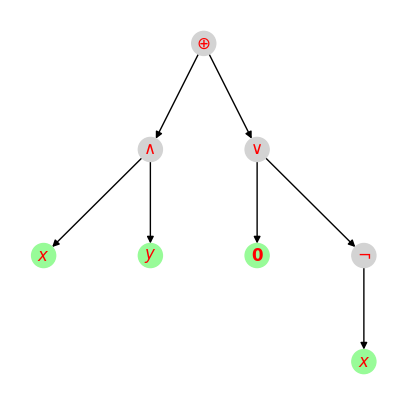

In [52]:
x, y = symbol('x'), symbol('y')

f = x & y ^ (O | ~x)
show(f)
drawGraph(f)

### Оценивание логических выражений

* По аналогии с оценкой арифметических выражений напишите функции оценки всех четырех логических операций. Для оценки бинарных операций используйте написанную ранее функцию `eval_binary`, которая автоматически выполняет поиск нужного оценщика и проводит преобразование типов операндов.

In [53]:
# Добавляем "оценщиков" к словарю бинарных операций OPERATIONS
OPERATIONS |= {'and': ['and_bool_bool'], 'or': ['or_bool_bool'], 'xor': ['xor_bool_bool']}

def and_bool_bool(a: tuple, b: tuple) -> tuple:
    """
    Оценивает логическую операцию 'and' для двух логических констант.

    Аргументы:
    a (tuple): Первый узел логической константы.
    b (tuple): Второй узел логической константы.

    Возвращает:
    tuple: Узел логической константы, представляющий результат операции 'and'.
    """
    value_a = options(a)['value']
    value_b = options(b)['value']
    return boolean_(value_a and value_b)

def eval_and(x: tuple) -> tuple:
    """
    Оцениватель операции 'and'.

    Аргументы:
    x (tuple): Узел операции 'and'.

    Возвращает:
    tuple: Результат операции 'and'.
    """
    a, b = eval_(x[1]), eval_(x[2])
    return eval_binary(ID(x), a, b)

def or_bool_bool(a: tuple, b: tuple) -> tuple:
    """
    Оценивает логическую операцию 'or' для двух логических констант.

    Аргументы:
    a (tuple): Первый узел логической константы.
    b (tuple): Второй узел логической константы.

    Возвращает:
    tuple: Узел логической константы, представляющий результат операции 'or'.
    """
    value_a = options(a)['value']
    value_b = options(b)['value']
    return boolean_(value_a or value_b)

def eval_or(x: tuple) -> tuple:
    """
    Оцениватель операции 'or'.

    Аргументы:
    x (tuple): Узел операции 'or'.

    Возвращает:
    tuple: Результат операции 'or'.
    """
    a, b = eval_(x[1]), eval_(x[2])
    return eval_binary(ID(x), a, b)

def xor_bool_bool(a: tuple, b: tuple) -> tuple:
    """
    Оценивает логическую операцию 'xor' для двух логических констант.

    Аргументы:
    a (tuple): Первый узел логической константы.
    b (tuple): Второй узел логической константы.

    Возвращает:
    tuple: Узел логической константы, представляющий результат операции 'xor'.
    """
    value_a = options(a)['value']
    value_b = options(b)['value']
    return boolean_(value_a != value_b)

def eval_xor(x: tuple) -> tuple:
    """
    Оцениватель операции 'xor'.

    Аргументы:
    x (tuple): Узел операции 'xor'.

    Возвращает:
    tuple: Результат операции 'xor'.
    """
    a, b = eval_(x[1]), eval_(x[2])
    return eval_binary(ID(x), a, b)

* Напишите оцениватель логического отрицания, операция унарная, поэтому все оценивание выполняется внутри одной функции

In [54]:
def eval_inv(x: tuple) -> tuple:
    """
    Оцениватель операции логического отрицания.

    Аргументы:
    x (tuple): Узел операции логического отрицания.

    Возвращает:
    tuple: Результат операции логического отрицания.
    """
    a = eval_(x[1])
    if ID(a) == 'bool':
        value = options(a)['value']
        return boolean_(not value)
    return x

* Проверяем:

In [55]:
f = (~I | I) ^ (O & I)
show(f)
show(evaluate(f))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* Напишите функцию `cast_integer_bool` для преобразования целых чисел в логические константы (как в языках C/C++): ноль преобразуется в логический ноль, все остальные числа - в логическую единицу

In [56]:
def cast_integer_bool(x: tuple) -> tuple:
    """
    Преобразует целое число в логическую константу.

    Аргументы:
    x (tuple): Узел целого числа.

    Возвращает:
    tuple: Узел логической константы.
    """
    value = options(x)['value']
    return boolean_(value != 0)

f = Z(2) ^ Z(1) | Z(10)
show(f)
show(evaluate(f))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Таблицы истинности

* Для построения таблицы истинности заданного логического выражения нам потребуется выполнять многократные подстановки в этом выражении каких-то значений вместо имен переменных. Напишем универсальную функцию подстановки `subs` (от английского substitute). Головная `subs` принимает на вход выражение `F` и словарь `V`, ключами в котором являются имена заменяемых переменных, а значениями - выражения, на которые эти переменные будут меняться (см. пример ниже).

* **ВАЖНО!!!** Чтобы объекты типа `Expression` можно было использовать в качестве ключей словаря, они должны быть *хешируемыми*. Т.к. мы переопределили операцию равенство (метод `__eq__` класса `Expression`), то класс стал нехешируемым. Чтобы исправить ситуацию, надо вручную добавить к **вашему определению** класса `Expression` метод `__hash__`, который преобразует наше списочное выражение в строку и вычисляет хеш от полученной строки:

```
class Expression:
  ...

  def __hash__(self):
    return hash(str(self.T))
```

In [57]:
def subs(F: Expression, V: dict) -> Expression:
    # преобразуем словарь V в списочную форму v
    v = {options(k.T)['name']: fix(V[k]).T for k in V}
    # вызываем списочную функцию подстановки
    return Expression(subs_(F.T, v))

def subs_(F: tuple, V: dict) -> tuple:
    # рекурсивная функция
    # если узел - переменная, ищем ее в словаре
    if ID(F) == 'symbol':
        n = options(F)['name']
        if n in V:
            # если переменная есть в словаре, то заменяем ее на соответствующее значение
            return V[n]
        else:
            # иначе оставляем как есть
            return F
    # если узел - не переменная, то рекурсивно вызываем ту же функцию для всех дочерних узлов
    A = [subs_(a, V) for a in items(F)]
    # и возвращаем такой же узел, но с обновленными дочерними поддеревьями
    return (ID(F), *A, options(F))

# проверяем

x, y = symbol('x'), symbol('y')
f = x * y
show(f)
g = subs(f, {x: 1 + y ** 2})
show(g)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* Пишем функцию `makeTable(F: Expression, V: list)` для преобразования заданного логического выражения в таблицу истинности. По числу переменных вычисляем высоту таблицы, делаем цикл по ее строкам. Номер строки представляем в двоичной форме, каждая цифра этого представления подставляется вместо соответствующей переменной в исходное выражение. Полученное константное выражение оценивается и преобразуется в 0 или 1. Из значений переменных и вычисленного значения выражения формируется строка таблицы, например, `000|1`. Выходом функции является список всех строк искомой таблицы истинности.

* (бонусное задание) напишите рекурсивную функцию `getVariables(F: Expression) -> list`, которая бы составляла список всех переменных, входящих в заданное выражение. Модифицируйте функцию `makeTable`, чтобы она принимала на вход только выражение, а список переменных составлялся бы автоматически.

In [58]:
def getVariables(F: Expression) -> list:
    """
    Рекурсивная функция, которая составляет список всех переменных, входящих в заданное выражение.

    Аргументы:
    F (Expression): Выражение, для которого нужно найти переменные.

    Возвращает:
    list: Список переменных.
    """
    variables = []

    def getVariables_(F: tuple):
        if ID(F) == 'symbol':
            n = options(F)['name']
            if n not in variables:
                variables.append(n)
        else:
            for a in items(F):
                getVariables_(a)

    getVariables_(F.T)
    return variables

In [59]:
def makeTable(F: Expression) -> list:
    V = getVariables(F)  # автоматически составляем список переменных
    n = len(V)  # число переменных, определяет высоту таблицы (2^n)
    table = []  # список строк
    for i in range(2 ** n):  # цикл по строкам таблицы истинности
        A = ('0' * n + bin(i)[2:])[-n:]  # преобразование номера строки в двоичное число в n разрядах
        S = {symbol(x): boolean(int(a)) for x, a in zip(V, A)}  # словарь для замены
        f = options(evaluate(subs(F, S)).T)['value']  # замена + оценивание + преобразование в цифру 0 или 1
        table.append(f"{A}|{f}")  # добавляем строку к таблице
    return table

* Напишите функцию `boolTable(F: Expression, V: list) -> None`, которая бы строила таблицу истинности выражения `F` и выводила ее на экран. Например, вызов `boolTable(x ^ y ^ ~z, [x, y, z])` должен печатать следующую таблицу:

```
000|1
001|0
010|0
011|1
100|0
101|1
110|1
111|0
```

In [60]:
def boolTable(F: Expression, V: list) -> None:
    table = makeTable(F)
    for row in table:
        print(row)

x, y, z = symbol('x'), symbol('y'), symbol('z')
f = x ^ y ^ ~z
show(f)
boolTable(f, [x, y, z])

<IPython.core.display.Math object>

000|1
001|0
010|0
011|1
100|0
101|1
110|1
111|0


### СДНФ

* Напишите функцию `DNF(V: list, F: str) -> Expression`, которая строит по заданному списку переменных `V` и заданному столбцу таблицы истинности `F` СДНФ. Если все значения в `F` равны нулю, функция должна возвращать логический ноль. Примеры: `DNF([x, y], '0110')` $\to \overline{x} \cdot y \vee x \cdot \overline{y}$, `DNF([x, y], '0110')` $\to \mathbf{0}$. Для получения списка значений переменных в строке таблицы с номером `i` используйте аналогичное преобразование из функции `makeTable` (пятая строка кода).

In [61]:
def DNF(V: list, F: str) -> Expression:
    n = len(V)
    expected_length = 2 ** n
    if len(F) != expected_length:
        raise ValueError(f"Length of F must be 2^{n} ({expected_length}), got {len(F)}")
    
    if set(F) == {'0'}:
        return Expression(integer_(0))  # Логический ноль
    
    terms = []
    for i, val in enumerate(F):
        if val == '1':
            binary = format(i, f'0{n}b')
            literals = []
            for bit, var in zip(binary, V):
                if bit == '0':
                    literal = ~var 
                else:
                    literal = var
                literals.append(literal)
            term = literals[0]
            for lit in literals[1:]:
                term = term & lit
            terms.append(term)
    
    if not terms:
        return Expression(integer_(0))  # Логический ноль
    
    dnf = terms[0]
    for term in terms[1:]:
        dnf = dnf | term
    
    return dnf

x, y = symbol('x'), symbol('y')
f = DNF([x, y], '0110')
show(f)

<IPython.core.display.Math object>

In [62]:
x, y, z = symbol('x'), symbol('y'), symbol('z')
f = DNF([x, y, z], '00010100')
show(f)

<IPython.core.display.Math object>

* (бонусное задание) Напишите аналогичную функцию `CNF(V: list, F: str) -> Expression`для построения СКНФ по заданной таблице истинности. Принцип двойственности: конъюнкции заменяются на дизъюнкции и наоборот, логический 0 заменяется на 1 и наоборот. Пример: `CNF([x, y], '0110')` $\to \left( x \vee y \right) \cdot \left( \overline{x} \vee \overline{y} \right)$

In [63]:
def CNF(V: list, F: str) -> Expression:
    n = len(V)
    expected_length = 2 ** n
    if len(F) != expected_length:
        raise ValueError(f"Length of F must be 2^{n} ({expected_length}), got {len(F)}")
    
    if set(F) == {'1'}:
        return Expression(integer_(1))
    if set(F) == {'0'}:
        return Expression(integer_(0))
    
    clauses = []
    for i, val in enumerate(F):
        if val == '0':
            binary = format(i, f'0{n}b')
            literals = []
            for bit, var in zip(binary, V):
                if bit == '0':
                    literal = var
                else:
                    literal = ~var
                literals.append(literal)
            clause = literals[0]
            for lit in literals[1:]:
                clause = clause | lit
            clauses.append(clause)
    
    if not clauses:
        return Expression(integer_(1))
    
    cnf = clauses[0]
    for clause in clauses[1:]:
        cnf = cnf & clause
    
    return cnf

x, y = symbol('x'), symbol('y')
f = CNF([x, y], '0110')
show(f)

<IPython.core.display.Math object>

* (бонусное задание) Напишите функцию `ZP(V: list, F: str) -> Expression`, преобразующую заданную таблицу истинности в полином Жегалкина. Пример: `ZP([x, y], '1110')` $\to \mathbf{1} \oplus x \cdot y$

In [64]:
# Функция для вычисления коэффициентов полинома Жегалкина
def zhegalkin_coefficients(table, variables):
    n = len(variables)
    if n == 0:
        return [table[0]]
    
    # Разделить truth table на две половины: когда первый переменный 0 и 1
    half = 2 ** (n - 1)
    low = table[:half]
    high = table[half:]
    
    # Рекурсивно вычислить коэффициенты для low
    c_low = zhegalkin_coefficients(low, variables[1:])
    
    # Рекурсивно вычислить коэффициенты для high XOR low
    c_high = [high[i] ^ low[i] for i in range(half)]
    c_high = zhegalkin_coefficients(c_high, variables[1:])
    
    # Объединить коэффициенты: c_low + x0 * c_high
    coefficients = c_low.copy()
    for i in range(len(c_high)):
        coefficients.append(c_high[i])
    
    return coefficients

def ZP(V: list, F: str) -> Expression:
    n = len(V)
    expected_length = 2 ** n
    if len(F) != expected_length:
        raise ValueError(f"Length of F must be 2^{n} ({expected_length}), got {len(F)}")
    
    if set(F) == {'0'}:
        return Expression(integer_(0))  # Логический ноль
    if set(F) == {'1'}:
        return Expression(integer_(1))  # Логическая единица
    
    # Преобразование truth table в список целых чисел
    truth_table = [int(bit) for bit in F]
    
    # Получить коэффициенты полинома Жегалкина
    coeffs = zhegalkin_coefficients(truth_table, V)
    
    # Если все коэффициенты нулевые, вернуть логический ноль
    if all(c == 0 for c in coeffs):
        return Expression(integer_(0))
    
    # Составить полином Жегалкина
    poly = Expression(integer_(0))
    for i in range(len(coeffs)):
        if coeffs[i] == 0:
            continue
        # Получить биты индекса i
        bits = format(i, f'0{n}b')
        term = Expression(integer_(1))
        for j in range(n):
            if bits[j] == '1':
                term = term & V[j]
        poly = poly ^ term
    
    # Упрощение выражения
    return evaluate(poly)

x, y = symbol('x'), symbol('y')
f = ZP([x, y], '1011')
show(f)

<IPython.core.display.Math object>

### Неравенства

* Напишите набор функций для представления операций сравнения ($x=y$, $x\ne y$, $x\lt y$, $x\le y$, $x \gt y$, $x \ge y$). Примеры:
 * `show(x != y)` $\to x \ne y$
 * `show(Z(1) < Z(2))` $\to 1 \lt 2$
 * `show((Z(1) < Z(2)) & (Z(4) >= Z(5)))` $\to (1 \lt 2) \wedge (4 \ge 5) $

In [65]:
...

x, y = symbol('x'), symbol('y')
show(x != y)
show(Z(1) < Z(2))
show((Z(1) < Z(2)) & (Z(4) >= Z(5)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* Напишите набор функций для оценивания операций сравнения целых и рациональных чисел. Результат оценивания - логическая константа. Примеры:
 * `show(evaluate(Z(1) < Z(2)))` $\to \mathbb{1}$
 * `show(evaluate((Z(1) < Z(2)) & (Z(4) >= Z(5))))` $\to \mathbb{0}$

In [66]:
# Функции сравнения целых чисел
def lt_integer_integer(a: tuple, b: tuple) -> tuple:
    """
    Сравнивает два целых числа на меньше.

    Аргументы:
    a (tuple): Первый узел целого числа.
    b (tuple): Второй узел целого числа.

    Возвращает:
    tuple: Узел логической константы.
    """
    n = options(a)['value']
    m = options(b)['value']
    return integer_(int(n < m))

def le_integer_integer(a: tuple, b: tuple) -> tuple:
    """
    Сравнивает два целых числа на меньше или равно.

    Аргументы:
    a (tuple): Первый узел целого числа.
    b (tuple): Второй узел целого числа.

    Возвращает:
    tuple: Узел логической константы.
    """
    n = options(a)['value']
    m = options(b)['value']
    return integer_(int(n <= m))

def gt_integer_integer(a: tuple, b: tuple) -> tuple:
    """
    Сравнивает два целых числа на больше.

    Аргументы:
    a (tuple): Первый узел целого числа.
    b (tuple): Второй узел целого числа.

    Возвращает:
    tuple: Узел логической константы.
    """
    n = options(a)['value']
    m = options(b)['value']
    return integer_(int(n > m))

def ge_integer_integer(a: tuple, b: tuple) -> tuple:
    """
    Сравнивает два целых числа на больше или равно.

    Аргументы:
    a (tuple): Первый узел целого числа.
    b (tuple): Второй узел целого числа.

    Возвращает:
    tuple: Узел логической константы.
    """
    n = options(a)['value']
    m = options(b)['value']
    return integer_(int(n >= m))

def eq_integer_integer(a: tuple, b: tuple) -> tuple:
    """
    Сравнивает два целых числа на равенство.

    Аргументы:
    a (tuple): Первый узел целого числа.
    b (tuple): Второй узел целого числа.

    Возвращает:
    tuple: Узел логической константы.
    """
    n = options(a)['value']
    m = options(b)['value']
    return integer_(int(n == m))

def ne_integer_integer(a: tuple, b: tuple) -> tuple:
    """
    Сравнивает два целых числа на неравенство.

    Аргументы:
    a (tuple): Первый узел целого числа.
    b (tuple): Второй узел целого числа.

    Возвращает:
    tuple: Узел логической константы.
    """
    n = options(a)['value']
    m = options(b)['value']
    return integer_(int(n != m))

# Функции сравнения рациональных чисел
def lt_rational_rational(a: tuple, b: tuple) -> tuple:
    """
    Сравнивает два рациональных числа на меньше.

    Аргументы:
    a (tuple): Первый узел рационального числа.
    b (tuple): Второй узел рационального числа.

    Возвращает:
    tuple: Узел логической константы.
    """
    na, ma = options(a)['num'], options(a)['denom']
    nb, mb = options(b)['num'], options(b)['denom']
    return integer_(int(na * mb < nb * ma))

def le_rational_rational(a: tuple, b: tuple) -> tuple:
    """
    Сравнивает два рациональных числа на меньше или равно.

    Аргументы:
    a (tuple): Первый узел рационального числа.
    b (tuple): Второй узел рационального числа.

    Возвращает:
    tuple: Узел логической константы.
    """
    na, ma = options(a)['num'], options(a)['denom']
    nb, mb = options(b)['num'], options(b)['denom']
    return integer_(int(na * mb <= nb * ma))

def gt_rational_rational(a: tuple, b: tuple) -> tuple:
    """
    Сравнивает два рациональных числа на больше.

    Аргументы:
    a (tuple): Первый узел рационального числа.
    b (tuple): Второй узел рационального числа.

    Возвращает:
    tuple: Узел логической константы.
    """
    na, ma = options(a)['num'], options(a)['denom']
    nb, mb = options(b)['num'], options(b)['denom']
    return integer_(int(na * mb > nb * ma))

def ge_rational_rational(a: tuple, b: tuple) -> tuple:
    """
    Сравнивает два рациональных числа на больше или равно.

    Аргументы:
    a (tuple): Первый узел рационального числа.
    b (tuple): Второй узел рационального числа.

    Возвращает:
    tuple: Узел логической константы.
    """
    na, ma = options(a)['num'], options(a)['denom']
    nb, mb = options(b)['num'], options(b)['denom']
    return integer_(int(na * mb >= nb * ma))

def eq_rational_rational(a: tuple, b: tuple) -> tuple:
    """
    Сравнивает два рациональных числа на равенство.

    Аргументы:
    a (tuple): Первый узел рационального числа.
    b (tuple): Второй узел рационального числа.

    Возвращает:
    tuple: Узел логической константы.
    """
    na, ma = options(a)['num'], options(a)['denom']
    nb, mb = options(b)['num'], options(b)['denom']
    return integer_(int(na * mb == nb * ma))

def ne_rational_rational(a: tuple, b: tuple) -> tuple:
    """
    Сравнивает два рациональных числа на неравенство.

    Аргументы:
    a (tuple): Первый узел рационального числа.
    b (tuple): Второй узел рационального числа.

    Возвращает:
    tuple: Узел логической константы.
    """
    na, ma = options(a)['num'], options(a)['denom']
    nb, mb = options(b)['num'], options(b)['denom']
    return integer_(int(na * mb != nb * ma))

# Добавляем функции сравнения в словарь OPERATIONS
OPERATIONS |= {
    'lt': ['lt_integer_integer', 'lt_rational_rational'],
    'le': ['le_integer_integer', 'le_rational_rational'],
    'gt': ['gt_integer_integer', 'gt_rational_rational'],
    'ge': ['ge_integer_integer', 'ge_rational_rational'],
    'eq': ['eq_integer_integer', 'eq_rational_rational'],
    'ne': ['ne_integer_integer', 'ne_rational_rational']
}


# Примеры использования
show(evaluate(Z(1) < Z(2)))  # $\to \mathbb{1}$
show(evaluate((Z(1) < Z(2)) & (Z(4) >= Z(5))))  # $\to \mathbb{0}$

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Селекторы (бонусное задание)

Выражение-селектор представляет собой последовательность пар (условие, выражение) и служит для выбора первого выражения, для которого выполняется соответствующее условие. Пример использования селекторов:
$$
|x| = \begin{cases}
x, & \text{if } x \ge 0, \\
-x, & \text{if } x < 0.
\end{cases}
$$
Или в сокращенном варианте (последнее выражение используется без условия, вариант команды else):
$$
\mathrm{sign}(x) = \begin{cases}
1, & \text{if } x > 0, \\
0, & \text{if } x = 0, \\
-1 & \text{else}.
\end{cases}
$$

* Функция `select_(*args)` создает списочное выражение-селектор для заданной последовательности нечетного числа аргументов: выражение_0, условие_0, выражение_1, условие_1, ..., выражение_n.
* Функция `select(*args)` создает аналогичное выражение-селектор типа `Expression`.
* Функция `latex_select` преобразует выражение в формат LaTeX (в линейной форме!)

In [67]:
def select_(*args) -> tuple:
  return 'select', *args, {}

def select(*args) -> Expression:
  A = [fix(a).T for a in args]
  return Expression(select_(*A))

def latex_select(x: tuple) -> str:
  A = [latex_(a) for a in items(x)]
  s = ""
  for i in range(len(A) // 2):
    s += f"{{{A[2 * i]}}} \\mathbf{{\\,if\\,}} {{{A[2 * i + 1]}}};"
  s += f"{{{A[-1]}}} \\mathbf{{\\,else}}"
  return f"\\left[{s}\\right]"

x = symbol('x')
f = select(Z(1), x > 0, Z(0), x == 0, Z(-1))
show(f)

<IPython.core.display.Math object>

* Напишите функцию `eval_select(x: tuple)` для оценивания выражений-селекторов. Пример для выражения `f` из предудыщей вкладки: `evaluate(subs(f, {x: Z(-100)}))` $\to -1$.

In [68]:
def eval_select(x: tuple) -> tuple:
    """
    Оценивает выражение-селектор.

    Аргументы:
    x (tuple): Узел выражения-селектора.

    Возвращает:
    tuple: Результат выражения, соответствующий первому истинному условию.
    """
    A = items(x)  # Получаем список дочерних узлов
    for i in range(0, len(A) - 1, 2):  # Проходим по парам (условие, выражение)
        condition = eval_(A[i + 1])  # Оцениваем условие
        if ID(condition) == 'bool' and options(condition)['value']:
            return eval_(A[i])  # Возвращаем соответствующее выражение
    return eval_(A[-1])  # Возвращаем последнее выражение (без условия)

show(evaluate(subs(f, {x: Z(3)})))
show(evaluate(subs(f, {x: Z(-100)})))
show(evaluate(subs(f, {x: Z(0)})))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Множества

* Реализуем конечные множества (конструктор, конструктор списочный, преобразование в LaTeX, оценка). Оценка множества - оценивание каждого элемента множества.

In [69]:
def fset_(*args) -> tuple:
    """
    Создает конечное множество из заданных элементов.

    Аргументы:
    *args: Элементы множества.

    Возвращает:
    tuple: Узел множества.
    """
    # Нормализация: удаляем повторяющиеся элементы
    normalized_args = []
    seen = set()
    for arg in args:
        # Используем строковое представление для проверки на равенство
        arg_str = str(arg)
        if arg_str not in seen:
            seen.add(arg_str)
            normalized_args.append(arg)
    
    return 'fset', *normalized_args, {}

def fset(*args) -> Expression:
  A = [fix(a).T for a in args]
  return Expression(fset_(*A))

def latex_fset(x: tuple) -> str:
  A = [latex_(a) for a in items(x)]
  return f"\\left\\{{ {','.join(A)} \\right\\}}"

def eval_fset(x: tuple) -> tuple:
  A = [eval_(a) for a in items(x)]
  return fset_(*A)

A = fset(1, Q(2,5) + Q(8, 5), 3)
show(A)
show(evaluate(A))
show(fset())

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [70]:
A = fset(1, Q(2,5) + Q(8, 5), 3, 1, 3, 4, 4, 4, 5, 5, 9)
show(A)
show(evaluate(A))
show(fset())

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* (бонусное задание) Добавьте к данной реализации функцию нормализации, которая должна удалять из множества повторяющиеся элементы (множество - это набор РАЗНЫХ элементов). Проверку на равенство элементов используйте элементарную - поэлементное равенство двух структур (или равенство строковых представлений этих структур). Вызов функции нормализации вставьте в списочный конструктор.

### Операции над конечными множествами

Операции (дополнение, объединение, пересечение, разность, симметрическая разность) будем реализовывать в виде **функций** (inversion, union, intersection, setdiff, symdiff), а не **бинарных операций**. Рассмотрим процесс на примере реализации операции объединения.

* Определяем приоритеты операций (для визуализации формул)
* Пишем конструкторы
* Пишем преобразование в LaTeX

In [71]:
priority['union'] = 3

def union_(x: tuple, y: tuple) -> tuple:
  return 'union', x, y, {}

def union(x: Expression, y: Expression) -> Expression:
  return Expression(union_(fix(x).T, fix(y).T))

def latex_union(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{{{a}}} \\cup {{{b}}}"

x, y = symbol('X'), symbol('Y')
show(union(x, y))

<IPython.core.display.Math object>

* Реализуйте по аналогии с объединением все остальные операции над множествами

In [72]:
priority['intersection'] = 3

def intersection_(x: tuple, y: tuple) -> tuple:
    return 'intersection', x, y, {}

def intersection(x: Expression, y: Expression) -> Expression:
    return Expression(intersection_(fix(x).T, fix(y).T))

def latex_intersection(x: tuple) -> str:
    a, b = latex_(x[1]), latex_(x[2])
    if Pr(x[1]) < Pr(x):
        a = enclose(a)
    if Pr(x[2]) <= Pr(x):
        b = enclose(b)
    return f"{{{a}}} \\cap {{{b}}}"

x, y = symbol('X'), symbol('Y')
show(intersection(x, y))

<IPython.core.display.Math object>

In [73]:
priority['setdiff'] = 3

def setdiff_(x: tuple, y: tuple) -> tuple:
    return 'setdiff', x, y, {}

def setdiff(x: Expression, y: Expression) -> Expression:
    return Expression(setdiff_(fix(x).T, fix(y).T))

def latex_setdiff(x: tuple) -> str:
    a, b = latex_(x[1]), latex_(x[2])
    if Pr(x[1]) < Pr(x):
        a = enclose(a)
    if Pr(x[2]) <= Pr(x):
        b = enclose(b)
    return f"{{{a}}} \\setminus {{{b}}}"

x, y = symbol('X'), symbol('Y')
show(setdiff(x, y))

<IPython.core.display.Math object>

In [74]:
priority['symdiff'] = 3

def symdiff_(x: tuple, y: tuple) -> tuple:
    return 'symdiff', x, y, {}

def symdiff(x: Expression, y: Expression) -> Expression:
    return Expression(symdiff_(fix(x).T, fix(y).T))

def latex_symdiff(x: tuple) -> str:
    a, b = latex_(x[1]), latex_(x[2])
    if Pr(x[1]) < Pr(x):
        a = enclose(a)
    if Pr(x[2]) <= Pr(x):
        b = enclose(b)
    return f"{{{a}}} \\triangle {{{b}}}"

x, y = symbol('X'), symbol('Y')
show(symdiff(x, y))

<IPython.core.display.Math object>

In [75]:
priority['inversion'] = 8

def inversion_(x: tuple) -> tuple:
    return 'inversion', x, {}

def inversion(x: Expression) -> Expression:
    return Expression(inversion_(fix(x).T))

def latex_inversion(x: tuple) -> str:
    a = latex_(x[1])
    return f"\\overline{{{a}}}"

x, y = symbol('X'), symbol('Y')
show(inversion(y + x))

<IPython.core.display.Math object>

* Напишем функцию оценивания операции объединения (`eval_union`)

In [76]:
def eval_union(x: tuple) -> tuple:
  a, b = eval_(x[1]), eval_(x[2]) # оцениваем операнды
  if ID(a) != 'fset' or ID(b) != 'fset':
    return ID(x), a, b, {} # если операнды не конечные множества, то ничего не делаем
  A, B = list(items(a)), list(items(b)) # преобразуем в списки
  C = A[:] # копируем все элементы из A в C
  for b in B: # цикл по всем элементам b из B
    inA = False
    for a in A:
      if b == a:
        inA = True # нашли в A элемент b
        break
    if not inA:
      C.append(b) # если не нашли b в A, то добавляем b в C
  return fset_(*C)

A = fset(*list(range(0, 6)))
B = fset(*list(range(0, 12, 2)))
C = union(A, B)
show(C == evaluate(C))

<IPython.core.display.Math object>

* Реализуйте оценивание остальных операций над множествами

In [77]:
def eval_intersection(x: tuple) -> tuple:
    a, b = eval_(x[1]), eval_(x[2])  # Оцениваем операнды
    if ID(a) != 'fset' or ID(b) != 'fset':
        return ID(x), a, b, {}  # Если операнды не конечные множества, то ничего не делаем
    A, B = list(items(a)), list(items(b))  # Преобразуем в списки
    C = []  # Инициализируем пустой список для пересечения
    for b in B:  # Цикл по всем элементам b из B
        for a in A:
            if b == a:
                C.append(b)  # Если элемент b найден в A, добавляем его в C
                break
    return fset_(*C)

A = fset(*list(range(0, 6)))
B = fset(*list(range(0, 12, 2)))
C = intersection(A, B)
show(C == evaluate(C))

<IPython.core.display.Math object>

In [78]:
def eval_setdiff(x: tuple) -> tuple:
    a, b = eval_(x[1]), eval_(x[2])  # Оцениваем операнды
    if ID(a) != 'fset' or ID(b) != 'fset':
        return ID(x), a, b, {}  # Если операнды не конечные множества, то ничего не делаем
    A, B = list(items(a)), list(items(b))  # Преобразуем в списки
    C = []  # Инициализируем пустой список для разности
    for a in A:  # Цикл по всем элементам a из A
        inB = False
        for b in B:
            if a == b:
                inB = True  # Нашли элемент a в B
                break
        if not inB:
            C.append(a)  # Если элемент a не найден в B, добавляем его в C
    return fset_(*C)

A = fset(*list(range(0, 6)))
B = fset(*list(range(0, 12, 2)))
C = setdiff(A, B)
show(C == evaluate(C))

<IPython.core.display.Math object>

In [79]:
def eval_symdiff(x: tuple) -> tuple:
    a, b = eval_(x[1]), eval_(x[2])  # Оцениваем операнды
    if ID(a) != 'fset' or ID(b) != 'fset':
        return ID(x), a, b, {}  # Если операнды не конечные множества, то ничего не делаем
    A, B = list(items(a)), list(items(b))  # Преобразуем в списки
    C = []  # Инициализируем пустой список для симметрической разности
    # Добавляем элементы, которые есть только в A
    for a in A:
        inB = False
        for b in B:
            if a == b:
                inB = True  # Нашли элемент a в B
                break
        if not inB:
            C.append(a)  # Если элемент a не найден в B, добавляем его в C
    # Добавляем элементы, которые есть только в B
    for b in B:
        inA = False
        for a in A:
            if b == a:
                inA = True  # Нашли элемент b в A
                break
        if not inA:
            C.append(b)  # Если элемент b не найден в A, добавляем его в C
    return fset_(*C)

A = fset(*list(range(0, 6)))
B = fset(*list(range(0, 12, 2)))
C = symdiff(A, B)
show(C == evaluate(C))

<IPython.core.display.Math object>

In [80]:
D = union(A, B)
E = intersection(A, B)
F = setdiff(D, E)
show(F == evaluate(F))

<IPython.core.display.Math object>

* (бонусное задание) Реализуйте быстрый вариант оценивания операций через предварительную сортировку элементов множества (см. презентацию лекции). Проведите сравнение двух реализаций по времени выполнения операций для больших множеств `A = fset(*list(range(0, n)))`, `B = fset(*list(range(0, 2 * n, 2)))`, для значений `n` из набора [10, 100, 1000, 10000].

In [81]:
def eval_union_fast(x: tuple) -> tuple:
    a, b = eval_(x[1]), eval_(x[2])  # Оцениваем операнды
    if ID(a) != 'fset' or ID(b) != 'fset':
        return ID(x), a, b, {}  # Если операнды не конечные множества, то ничего не делаем
    A, B = list(items(a)), list(items(b))  # Преобразуем в списки
    A.sort()  # Сортируем A
    B.sort()  # Сортируем B
    C = []  # Инициализируем пустой список для объединения
    i, j = 0, 0  # Указатели на элементы A и B
    while i < len(A) and j < len(B):
        if A[i] < B[j]:
            C.append(A[i])
            i += 1
        elif A[i] > B[j]:
            C.append(B[j])
            j += 1
        else:
            C.append(A[i])
            i += 1
            j += 1
    # Добавляем оставшиеся элементы из A
    while i < len(A):
        C.append(A[i])
        i += 1
    # Добавляем оставшиеся элементы из B
    while j < len(B):
        C.append(B[j])
        j += 1
    return fset_(*C)

In [82]:
def eval_intersection_fast(x: tuple) -> tuple:
    a, b = eval_(x[1]), eval_(x[2])  # Оцениваем операнды
    if ID(a) != 'fset' or ID(b) != 'fset':
        return ID(x), a, b, {}  # Если операнды не конечные множества, то ничего не делаем
    A, B = list(items(a)), list(items(b))  # Преобразуем в списки
    A.sort()  # Сортируем A
    B.sort()  # Сортируем B
    C = []  # Инициализируем пустой список для пересечения
    i, j = 0, 0  # Указатели на элементы A и B
    while i < len(A) and j < len(B):
        if A[i] < B[j]:
            i += 1
        elif A[i] > B[j]:
            j += 1
        else:
            C.append(A[i])
            i += 1
            j += 1
    return fset_(*C)

In [83]:
def eval_setdiff_fast(x: tuple) -> tuple:
    a, b = eval_(x[1]), eval_(x[2])  # Оцениваем операнды
    if ID(a) != 'fset' or ID(b) != 'fset':
        return ID(x), a, b, {}  # Если операнды не конечные множества, то ничего не делаем
    A, B = list(items(a)), list(items(b))  # Преобразуем в списки
    A.sort()  # Сортируем A
    B.sort()  # Сортируем B
    C = []  # Инициализируем пустой список для разности
    i, j = 0, 0  # Указатели на элементы A и B
    while i < len(A) and j < len(B):
        if A[i] < B[j]:
            C.append(A[i])
            i += 1
        elif A[i] > B[j]:
            j += 1
        else:
            i += 1
            j += 1
    # Добавляем оставшиеся элементы из A
    while i < len(A):
        C.append(A[i])
        i += 1
    return fset_(*C)

In [84]:
def eval_symdiff_fast(x: tuple) -> tuple:
    a, b = eval_(x[1]), eval_(x[2])  # Оцениваем операнды
    if ID(a) != 'fset' or ID(b) != 'fset':
        return ID(x), a, b, {}  # Если операнды не конечные множества, то ничего не делаем
    A, B = list(items(a)), list(items(b))  # Преобразуем в списки
    A.sort()  # Сортируем A
    B.sort()  # Сортируем B
    C = []  # Инициализируем пустой список для симметрической разности
    i, j = 0, 0  # Указатели на элементы A и B
    while i < len(A) and j < len(B):
        if A[i] < B[j]:
            C.append(A[i])
            i += 1
        elif A[i] > B[j]:
            C.append(B[j])
            j += 1
        else:
            i += 1
            j += 1
    # Добавляем оставшиеся элементы из A
    while i < len(A):
        C.append(A[i])
        i += 1
    # Добавляем оставшиеся элементы из B
    while j < len(B):
        C.append(B[j])
        j += 1
    return fset_(*C)

In [85]:
# import timeit

# def test_operation(operation, n):
#     A = fset(*list(range(0, n)))
#     B = fset(*list(range(0, 2 * n, 2)))
#     op = operation(A, B)
#     return timeit.timeit(lambda: evaluate(op), number=100)

# # Тестируем для разных значений n
# n_values = [10, 100, 1000]
# operations = [union, intersection, setdiff, symdiff]

# for n in n_values:
#     print(f"n = {n}")
#     for op in operations:
#         slow_time = test_operation(op, n)
#         fast_time = test_operation(op, n)  # Используем быстрый вариант
#         print(f"{op.__name__}: Slow = {slow_time:.6f} s, Fast = {fast_time:.6f} s")

### Другие "типы" множеств

Реализуйте представление множеств следующих типов (только конструкторы и преобразователи в LaTeX):

* Множества-константы (`cset`): $\mathbb{N}$, $\mathbb{Z}$, $\mathbb{Q}$, $\mathbb{R}$, $\varnothing$.
* Интервальные множества (`iset`): $(-\infty, 0) \cup (1, 2]$. Задаются набором пар границ и их типов (закрытые/открытые). Также нужно будет определить специальный объект - бесконечность, `infinity`.
* Параметрические множества (`pset`): $\{2n+1\,|\,n\in \mathbb{Z}\}$. Задаются тремя элементами - выражением ($2n+1$), переменной ($n$), множеством ($\mathbb{Z}$).
* Условные множества (`aset`): $\{x\in\mathbb{R}\,|\,x>0\}$. Задаются тремя элементами - переменной, множеством, условием.

In [86]:
def cset_(name: str) -> tuple:
    """
    Создает множество-константу.

    Аргументы:
    name (str): Имя множества (например, 'N', 'Z', 'Q', 'R', 'empty').

    Возвращает:
    tuple: Узел множества-константы.
    """
    return 'cset', {'name': name}

def cset(name: str) -> Expression:
    """
    Создает объект множества-константы.

    Аргументы:
    name (str): Имя множества.

    Возвращает:
    Expression: Объект множества-константы.
    """
    return Expression(cset_(name))

def latex_cset(x: tuple) -> str:
    """
    Преобразует множество-константу в формат LaTeX.

    Аргументы:
    x (tuple): Узел множества-константы.

    Возвращает:
    str: Строка в формате LaTeX.
    """
    name = options(x)['name']
    if name == 'N':
        return "\\mathbb{N}"
    elif name == 'Z':
        return "\\mathbb{Z}"
    elif name == 'Q':
        return "\\mathbb{Q}"
    elif name == 'R':
        return "\\mathbb{R}"
    elif name == 'empty':
        return "\\varnothing"
    else:
        return f"\\text{{{name}}}"
    
# Множества-константы
n = cset('N')
z = cset('Z')
q = cset('Q')
r = cset('R')
empty = cset('empty')
show(n)
show(z)
show(q)
show(r)
show(empty)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [87]:
import re

def parse_interval(s: str) -> list:
    """
    Парсит строку интервала и возвращает список интервалов.

    Аргументы:
    s (str): Строка вида "(-3, 5) U (8, 10]"

    Возвращает:
    list: Список интервалов, где каждый интервал - это пара границ и их типов.
    """
    # Регулярное выражение для поиска интервалов
    pattern = r"(\(|\[)([^,]+),([^,]+)(\)|\])"
    intervals = re.findall(pattern, s)
    
    parsed_intervals = []
    for interval in intervals:
        left_bracket, left_value, right_value, right_bracket = interval
        left_value = float(left_value) if left_value != "-inf" else -float('inf')
        right_value = float(right_value) if right_value != "inf" else float('inf')
        left_type = 'open' if left_bracket == '(' else 'closed'
        right_type = 'open' if right_bracket == ')' else 'closed'
        parsed_intervals.append([(left_value, left_type), (right_value, right_type)])
    
    return parsed_intervals

def iset_(s: str) -> tuple:
    """
    Создает интервальное множество из строки.

    Аргументы:
    s (str): Строка вида "(-3, 5) U (8, 10]"

    Возвращает:
    tuple: Узел интервального множества.
    """
    intervals = parse_interval(s)
    return 'iset', {'intervals': intervals}

def iset(s: str) -> Expression:
    """
    Создает объект интервального множества из строки.

    Аргументы:
    s (str): Строка вида "(-3, 5) U (8, 10]"

    Возвращает:
    Expression: Объект интервального множества.
    """
    return Expression(iset_(s))

def latex_iset(x: tuple) -> str:
    """
    Преобразует интервальное множество в формат LaTeX.

    Аргументы:
    x (tuple): Узел интервального множества.

    Возвращает:
    str: Строка в формате LaTeX.
    """
    intervals = options(x)['intervals']
    latex_intervals = []
    for interval in intervals:
        left, right = interval
        left_bracket = "(" if left[1] == 'open' else "["
        right_bracket = ")" if right[1] == 'open' else "]"
        left_value = f"-\\infty" if left[0] == -float('inf') else f"{left[0]}"
        right_value = f"\\infty" if right[0] == float('inf') else f"{right[0]}"
        latex_intervals.append(f"{left_bracket}{left_value}, {right_value}{right_bracket}")
    return " \\cup ".join(latex_intervals)

# Создаем интервальное множество из строки
interval_str = "(-3, 5) U (8, 10]"
interval = iset(interval_str)
show(interval)

# Другой пример
interval_str_2 = "(-inf, 0) U [1, inf)"
interval_2 = iset(interval_str_2)
show(interval_2)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* (бонусное задание) Реализуйте оценивание множественных операций над интервальными множествами.

In [88]:
...

Ellipsis

### Матрицы

* Пишем конструктор матриц произвольного размера, входом является список элементов и рамеры матрицы.

In [89]:
def matrix_(A: list, n: int, m: int) -> tuple:
    """
    Создает узел матрицы.

    Аргументы:
    A (list): Список элементов матрицы.
    n (int): Количество строк.
    m (int): Количество столбцов.

    Возвращает:
    tuple: Узел матрицы.
    """
    return 'matrix', *A, {'dim': (n, m)}

def matrix(A: list, n: int, m: int) -> Expression:
    """
    Создает объект матрицы.

    Аргументы:
    A (list): Список элементов матрицы.
    n (int): Количество строк.
    m (int): Количество столбцов.

    Возвращает:
    Expression: Объект матрицы.
    """
    B = [fix(a).T for a in A]  # Преобразуем каждый элемент в объект Expression
    return Expression(matrix_(B, n, m))

* Реализуйте функцию преобразования матрицы в формат LaTeX. Пример: `matrix([1, 2, 3, 4], 2, 2)` $\to \left[\begin{array}{cc} 1 & 2 \\ 3 & 4 \\\end{array}\right]$ (см. код вкладки).

In [90]:
def latex_matrix(x: tuple) -> str:
    """
    Преобразует матрицу в формат LaTeX.

    Аргументы:
    x (tuple): Узел матрицы.

    Возвращает:
    str: Строка в формате LaTeX.
    """
    A = items(x)  # Получаем список элементов матрицы
    n, m = options(x)['dim']  # Получаем размеры матрицы (n x m)
    
    # Создаем строку для LaTeX-представления
    rows = []
    for i in range(n):
        row_elements = [latex_(A[i * m + j]) for j in range(m)]  # Преобразуем каждый элемент в LaTeX
        rows.append(" & ".join(row_elements))  # Объединяем элементы строки через &
    
    matrix_body = " \\\\ ".join(rows)  # Объединяем строки через \\
    return f"\\left[\\begin{{array}}{{{'c' * m}}}\n{matrix_body}\n\\end{{array}}\\right]"

A = matrix([1, 2, 3, 4], 2, 2)
show(A)

<IPython.core.display.Math object>

* Напишите функции-конструкторы векторов (`cvector` - столбцы, `rvector` - строки), аргументом является список значений, длина вычисляется автоматически. Внутренним представлением должна быть **матрица**, у которой одна из размерностей будет равна единице (т.е. новый тип объектов создавать не нужно). Пример:
`cvector([1, 2]).T` $\to$ `('matrix', ('integer', {'value': 1}), ('integer', {'value': 2}), {'dim': (2, 1)})`.

In [91]:
def cvector(A: list) -> Expression:
    """
    Создает столбец (матрицу с одной колонкой).

    Аргументы:
    A (list): Список значений.

    Возвращает:
    Expression: Объект матрицы, представляющий столбец.
    """
    n = len(A)  # Вычисляем длину столбца
    return matrix(A, n, 1)  # Создаем матрицу с n строками и 1 колонкой

def rvector(A: list) -> Expression:
    """
    Создает строку (матрицу с одной строкой).

    Аргументы:
    A (list): Список значений.

    Возвращает:
    Expression: Объект матрицы, представляющий строку.
    """
    m = len(A)  # Вычисляем длину строки
    return matrix(A, 1, m)  # Создаем матрицу с 1 строкой и m колонками
  
  # Создаем столбец
v = cvector([1, 2, 3])
show(v)

# Создаем строку
w = rvector([4, 5, 6])
show(w)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [92]:
cvector([1, 2]).T

('matrix',
 ('integer', {'value': 1}),
 ('integer', {'value': 2}),
 {'dim': (2, 1)})

* Напишите функцию `eval_matrix`, выполняющую оценивание элементов матрицы.

In [93]:
def eval_matrix(x: tuple) -> tuple:
    """
    Оценивает элементы матрицы.

    Аргументы:
    x (tuple): Узел матрицы.

    Возвращает:
    tuple: Оцененная матрица.
    """
    A = items(x)  # Получаем список элементов матрицы
    n, m = options(x)['dim']  # Получаем размеры матрицы (n x m)
    
    # Оцениваем каждый элемент матрицы
    evaluated_elements = [eval_(a) for a in A]
    
    # Возвращаем новую матрицу с оцененными элементами
    return matrix_(evaluated_elements, n, m)

A = matrix([1, Z(2) * Z(7), 3, 4], 2, 2)
show(A)
show(evaluate(A))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* Реализуйте оценивание арифметических операций над матрицами: умножение на число, сложение, вычитание, умножение.

In [94]:
# Функция сложения матриц
def add_matrix_matrix(A: tuple, B: tuple) -> tuple:
    """
    Складывает две матрицы.

    Аргументы:
    A (tuple): Узел первой матрицы.
    B (tuple): Узел второй матрицы.

    Возвращает:
    tuple: Результат сложения матриц.
    """
    n, m = options(A)['dim']  # Получаем размеры матрицы
    A_elements = items(A)  # Получаем элементы первой матрицы
    B_elements = items(B)  # Получаем элементы второй матрицы
    
    # Складываем соответствующие элементы матриц
    result_elements = [add_(a, b) for a, b in zip(A_elements, B_elements)]
    
    return matrix_(result_elements, n, m)

# Добавляем функцию в словарь OPERATIONS
OPERATIONS['add'].append('add_matrix_matrix')

# Создаем матрицы
A = matrix([Q(2, 3), 3, 4, Q(-1, 4)], 2, 2)
B = matrix([1, 1, 1, 1], 2, 2)

# Сложение матриц
C = A + B
show(C)
show(evaluate(C))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
def mul_matrix_integer(A: tuple, b: tuple) -> tuple:
    """
    Умножает матрицу на целое число.

    Аргументы:
    A (tuple): Узел матрицы.
    b (tuple): Узел целого числа.

    Возвращает:
    tuple: Результат умножения матрицы на число.
    """
    n, m = options(A)['dim']  # Получаем размеры матрицы
    b_value = options(b)['value']  # Получаем значение числа
    A_elements = items(A)  # Получаем элементы матрицы
    
    # Умножаем каждый элемент матрицы на число
    result_elements = [mul_(a, b) for a in A_elements]
    
    return matrix_(result_elements, n, m)

# Добавляем функцию в словарь OPERATIONS
OPERATIONS['mul'].append('mul_matrix_integer')

# Умножение матрицы на число
D = A * Z(2)
show(D)
show(evaluate(D))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [96]:
def sub_matrix_matrix(A: tuple, B: tuple) -> tuple:
    """
    Вычитает две матрицы.

    Аргументы:
    A (tuple): Узел первой матрицы.
    B (tuple): Узел второй матрицы.

    Возвращает:
    tuple: Результат вычитания матриц.
    """
    n, m = options(A)['dim']  # Получаем размеры матрицы
    A_elements = items(A)  # Получаем элементы первой матрицы
    B_elements = items(B)  # Получаем элементы второй матрицы
    
    # Вычитаем соответствующие элементы матриц
    result_elements = [sub_(a, b) for a, b in zip(A_elements, B_elements)]
    
    return matrix_(result_elements, n, m)

# Добавляем функцию в словарь OPERATIONS
OPERATIONS['sub'].append('sub_matrix_matrix')

E = A - B
show(E)
show(evaluate(E))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* (бонусное задание) Реализуйте представление и оценивание операции транспонирования матрицы `transpose`

In [97]:
def transpose_(x: tuple) -> tuple:
    """
    Создает узел транспонированной матрицы.

    Аргументы:
    x (tuple): Узел исходной матрицы.

    Возвращает:
    tuple: Узел транспонированной матрицы.
    """
    A = items(x)  # Получаем список элементов исходной матрицы
    n, m = options(x)['dim']  # Получаем размеры исходной матрицы (n x m)
    
    # Создаем транспонированную матрицу
    transposed_elements = [A[j * n + i] for i in range(n) for j in range(m)]
    
    return matrix_(transposed_elements, m, n)

def transpose(x: Expression) -> Expression:
    """
    Создает объект транспонированной матрицы.

    Аргументы:
    x (Expression): Исходная матрица.

    Возвращает:
    Expression: Объект транспонированной матрицы.
    """
    return Expression(transpose_(x.T))

A = matrix([1, 2, 3, 4], 2, 2)
show(A)

# Транспонируем матрицу
A_transposed = transpose(A)
show(A_transposed)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [98]:
def eval_transpose(x: tuple) -> tuple:
    """
    Оценивает транспонированную матрицу.

    Аргументы:
    x (tuple): Узел транспонированной матрицы.

    Возвращает:
    tuple: Узел транспонированной матрицы с оцененными элементами.
    """
    A = items(x)  # Получаем список элементов исходной матрицы
    n, m = options(x)['dim']  # Получаем размеры исходной матрицы (n x m)
    
    # Оцениваем каждый элемент матрицы
    evaluated_elements = [eval_(a) for a in A]
    
    # Создаем транспонированную матрицу
    transposed_elements = [evaluated_elements[j * n + i] for i in range(n) for j in range(m)]
    
    return matrix_(transposed_elements, m, n)

### Решение систем линейных уравнений методом Гаусса

* Пишем головную функцию `solveLinearSystem`, вызывающую списочный вариант этой функции и выполняющий оценку результата.

In [99]:
def solveLinearSystem(A: Expression, b: Expression) -> Expression:
  x = solveLinearSystem_(A.T, b.T)
  return Expression(eval_(x))

* Напишите основную функцию `solveLinearSystem_`, реализующую сам метод Гаусса. Т.к. алгоритм должен работать в символьной форме (со списочными выражениями, а не с числами), то вместо знаков арифметических операций нужно использовать списочные функции `add_`, `mul_` и т.д.

In [100]:
def solveLinearSystem_(A: tuple, b: tuple) -> tuple:
    x = list(items(b))  # Преобразуем b в список
    n = len(x)  # Размер системы
    C = [list(items(A)[i * n: (i + 1) * n]) for i in range(n)]  # Преобразуем A в двумерный список (список списков) C

    # Прямой ход (приведение к верхнетреугольной форме)
    for k in range(n):
        # Деление строки на диагональный элемент
        for j in range(k + 1, n):
            C[k][j] = div_(C[k][j], C[k][k])
        x[k] = div_(x[k], C[k][k])

        # Обнуление элементов под диагональю
        for i in range(k + 1, n):
            for j in range(k + 1, n):
                C[i][j] = sub_(C[i][j], mul_(C[i][k], C[k][j]))
            x[i] = sub_(x[i], mul_(C[i][k], x[k]))

    # Обратный ход (нахождение решения)
    for k in range(n - 1, -1, -1):
        for j in range(k + 1, n):
            x[k] = sub_(x[k], mul_(C[k][j], x[j]))

    return matrix_(x, n, 1)

* Проверяем (на выходе должен быть вектор-столбец `[1, 1]`):

In [101]:
A = matrix([1, 2, 3, 4], 2, 2)
b = cvector([3, 7])
show(A == b)
x = solveLinearSystem(A, b)
show(x)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* Наша реализация позволяет решать и системы с параметрами (пока без упрощения результата):

In [102]:
p, q, x = symbol('p'), symbol('q'), symbol('x')
A = matrix([p, 1, 1, q], 2, 2)
b = cvector([1, 1])
show(A * x == b)
x = solveLinearSystem(A, b)
show(x)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

***

**Задание выполняется в ноутбуке, который был создан при выполнении первых трех заданий!**


# Лекция 4

### Представление многочленов

* Напишем набор функций для проверки, является ли заданное выражение нулем (без его вычислений и упрощений). Головная функция работает с выражениями типа `Expression`, а служебные функции должны проверять на равенство нулю конкретные списочные объекты. Нулевыми могут быть целые числа, рациональные числа, матрицы, многочлены и т.д. Сравнение многочлена с нулем реализуем ниже.

In [103]:
def isZero(x: Expression) -> bool:
  return is_zero(x.T)

def is_zero(x: tuple) -> bool:
  try:
    cmd = eval(f"is_zero_{ID(x)}")
    return cmd(x)
  except:
    return False

def is_zero_integer(x: tuple) -> bool:
    """
    Проверяет, является ли целое число нулем.

    Аргументы:
    x (tuple): Узел целого числа.

    Возвращает:
    bool: True, если число равно нулю, иначе False.
    """
    return options(x)['value'] == 0

def is_zero_rational(x: tuple) -> bool:
    """
    Проверяет, является ли рациональное число нулем.

    Аргументы:
    x (tuple): Узел рационального числа.

    Возвращает:
    bool: True, если числитель равен нулю, иначе False.
    """
    return options(x)['num'] == 0

print(isZero(Z(0)), isZero(Z(1)), isZero(Q(1, 2)), isZero(Q(0, 1)))

True False False True


* Пишем конструкторы многочленов, головная функция принимает на вход список коэффициентов (в порядке от младшего к старшему): `[1, 2, 3]` $\to 3x^2+2x+1$, и опционально переменную и порядок слагаемых для визуализации формулы (`rev=True` $\to 1+2x+3x^2$). Списочный конструктор преобразует все целые коэффициенты в рациональные (чтобы упростить последующие манипуляции с многочленами),вызывает функцию нормализации, которая должна удалить все **старшие** нули из списка коэффициентов: (`[1, 2, 3, 0, 0]` -> `[1, 2, 3]`), и создает кортеж, в котором первым элементом (не считая ID) идет переменная, а дальше перечисляются все коэффициенты многочлена. Если в многочлене все коэффициенты нулевые, то это нулевой многочлен и он представляется пустым списком коэффициентов.

In [ ]:
def polynomial(A: list, var: Expression = symbol('x'), rev = False) -> Expression:
  C = [fix(a).T for a in A]
  return Expression(polynomial_(C, var.T, rev))

def polynomial_(A: list, var: tuple = symbol_('x'), rev: bool = False) -> tuple:
  B = [cast_integer_rational(a) if ID(a) == 'integer' else a for a in A]
  C = normalize_polynomial(B)
  return 'polynomial', var, *C, {'rev': rev}

def normalize_polynomial(A: list) -> list:
  # используйте функцию is_zero для проверки элемента на равенство нулю
  B = []
  isContinue = False
  for i in range(len(A)-1, -1, -1):
    if is_zero(A[i]) and not isContinue:
      continue
    B.append(A[i])
    isContinue = True
  B.reverse()
  return B

p = polynomial([1, 2, 3, 0, 0])
for t in items(p.T):
  show(Expression(t))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* Напишем функцию `linear_combination` для построения линейных комбинаций (в списочном представлении): заданы два списка выражений, надо построить выражение, являющееся суммой попарных произведений соответствующих элементов этих двух списков: $[1, 2, 3], [x^2, x, 1] \to x^2 + 2x + 3$. Эта функция будет использоваться нами, в частности, для визуализации многочленов. Результирующее выражение должно быть построено в максимально естественном виде: если один из сомножителей равен нулю, то данное произведение в линейную комбинацию не включается; если один из сомножителей равен единице, то он не включается в произведение; если первый коэффициент - отрицательное число, то он заменяется на свой модуль, а слагаемое включается в сумму через вычитание (а не сложение) и т.д. Если все слагаемые нулевые, то выходом должно быть число 0.

In [105]:
def linear_combination(A: list, B: list) -> tuple:
  A = [cast_integer_rational(a) if ID(a) == 'integer' else a for a in A]
  B = [cast_integer_rational(b) if ID(b) == 'integer' else b for b in B]
  sum = None
  for a, b in zip(A, B):
    # генерируем новое слагаемое и включаем его в итоговую сумму
    sum = next_term(sum, a, b)
  return sum if sum else integer_(0)

def next_term(sum: tuple, a: tuple, b: tuple) -> tuple:
  if is_zero(a) or is_zero(b):
    return sum # нулевые слагаемые в сумму не включаем
  s, t = make_term(a, b) # генерируем знак слагаемого (s) и само слагаемое (t)
  if sum == None: # если слагаемое первое, его не надо прибавлять или вычитать
    if s == 1: return t # положительное первое слагаемое
    # отрицательное первое слагаемое
    if ID(t) == 'mul': return mul_(neg_(t[1]), t[2]) # вносим `-` в первый множитель, если он есть
    return neg_(t)
  # если знак +, то прибавляем слагаемое к сумме, если -, то вычитаем
  return add_(sum, t) if s == 1 else sub_(sum, t)

def make_term(a: tuple, b: tuple) -> tuple:
  s = 1 # знак по умолчанию +
  if ID(a) == 'rational':
    # если первый множитель - число, анализируем его знак и значение
    n, m = options(a)['num'], options(a)['denom']
    if (n, m) == (1, 1): return 1, b # a = 1
    if (n, m) == (-1, 1): return -1, b # a = -1
    if n < 0: s, a = -1, rational_(-n, m) # a < 0
  # если b == 1, то возвращаем (s, a), иначе (s, a*b)
  return (s, a) if b == rational_(1, 1) else (s, mul_(a, b))

n = 5
A = [integer_(k-2) for k in range(n)]
B = [deg_(symbol_('x'), integer_(n - 1 - k)) if k != n - 1 else integer_(1) for k in range(n)]
show(Expression(linear_combination(A, B)))

A = [symbol_(a) for a in 'abc']
B = [deg_(symbol_('x'), integer_(2)), symbol_('x'), integer_(1)]
show(Expression(linear_combination(A, B)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* Напишите функцию `make_deg(x: tuple, k: int)`, которая по заданной переменной $x$ и степени $k$ делает списочное степенное выражение. Нужно учитывать случаи $k=0$ (степень равна 1) и $k=1$ (степень равна $x$).

In [106]:
def make_deg(x: tuple, k: int) -> tuple:
    """
    Создает списочное степенное выражение для заданной переменной x и степени k.

    Аргументы:
    x (tuple): Узел переменной.
    k (int): Степень.

    Возвращает:
    tuple: Списочное степенное выражение.
    """
    A = [integer_(1)]
    for i in range(1, k):
        if i == 1:
            A.append(x)
            continue
        A.append(deg_(x, integer_(i)))
    return A


* Напишите функцию `polynomial2expression(x: tuple)` для преобразования многочлена в арифметическое выражение с использованием функции `linear_combination`. Нужно выделить из многочлена список `A` коэффициентов (первый элемент `items(x)` - это переменная, остальные - коэффициенты), создать список `D` такой же длины из степеней переменной (функция `make_deg`), если флаг `options(x)['rev']` равен `True`, то обратить оба списка. Вызвать функцию `linear_combination(A, D)` и вернуть собранное ею выражение.

In [107]:
def polynomial2expression(x: tuple) -> tuple:
  v, A, rev = items(x)[0], items(x)[1:], options(x)['rev']
  D = make_deg(v, len(A))
  if not rev:
    A, D = list(A)[::-1], D[::-1] # обратить списки A и D
  return linear_combination(A, D)

In [108]:
p = polynomial([1, 2, 3])
expr = polynomial2expression(p.T)
show(Expression(expr))

# Пример многочлена с обратным порядком
p_rev = polynomial([1, 2, 3], rev=True)
expr_rev = polynomial2expression(p_rev.T)
show(Expression(expr_rev))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* Для преобразование многочлена в формат LaTeX преобразуем его в арифметическое выражение, которое стандартным образом преобразуем в LaTeX. Проверяем!

In [109]:
def latex_polynomial(x: tuple) -> str:
  return latex_(polynomial2expression(x))

p = polynomial([Q(-2, 3), -2, 0, Q(5, 15), 0, 0], rev = True)
show(p)

p = polynomial([3, -2, 1])
show(p)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Арифметика

* Определим приоритет "операции" polynomial равным 5 (меньше арифметических операций), чтобы они отделялись от других операндов скобками.

In [110]:
priority['polynomial'] = 5
p = polynomial([3, -2, 1])
q = polynomial([-1, 0, 1])
show((p * q) / (-p + q))

<IPython.core.display.Math object>

* Напишем функцию оценивания многочлена `eval_polynomial(x: tuple)`, которая должна 1) оценивать рекурсивно все коэффициенты многочлена (включая переменную); 2) если 'переменная' многочлена является числом (а это не запрещено нашим конструктором), то нужно преобразовать многочлен в выражение и оценить его. Последняя операция позволит выполнять подстановку в многочлен числовых значений с вычислением результата (см. последний пример в коде).  

In [111]:
def eval_polynomial(x: tuple) -> tuple:
  A = [eval_(a) for a in items(x)]
  if ID(A[0]) in ['integer', 'rational']:
    return eval_(polynomial2expression(x))
  return 'polynomial', *A, options(x)

p = polynomial([0, 1, Q(3, 2) + 1, 0, 0, 1])
show(p)
show(evaluate(p))
show(evaluate(subs(p, {symbol('x'): Q(1, 2)})))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* Реализуем оценивание операции сложения многочленов. Добавим соответствующую команду в словарь `OPERATIONS`.

In [112]:
OPERATIONS['add'].append('add_polynomial_polynomial')

* Напишите функцию выравнивания длин двух списков `A` и `B` дополнением короткого списка "нулевыми" элементами `val` до длины длиннного списка. Функция должна вернуть два списка одинаковой длины.

In [113]:
def align_lists(A: list, B: list, val: tuple = rational_(0, 1)) -> tuple:
    """
    Выравнивает длины двух списков A и B, дополняя короткий список нулевыми элементами val.

    Аргументы:
    A (list): Первый список.
    B (list): Второй список.
    val (tuple): Нулевой элемент для дополнения (по умолчанию рациональное число 0/1).

    Возвращает:
    tuple: Два списка одинаковой длины.
    """
    # Определяем длины списков
    len_A, len_B = len(A), len(B)
    
    # Дополняем короткий список нулевыми элементами val
    if len_A < len_B:
        A += [val] * (len_B - len_A)
    elif len_B < len_A:
        B += [val] * (len_A - len_B)
    
    return A, B

* Пишем и проверяем код операции сложения. Если переменные у двух многочленов не совпадают, то операцию выполнить нельзя, выбрасываем исключение, которое будет "поймано" функцией `eval_`.  

In [114]:
def add_polynomial_polynomial(x: tuple, y: tuple) -> tuple:
  if x[1] != y[1]: # переменные не совпадают, операция не выполнима!
    raise
  A, B = align_lists(list(items(x)[1:]), list(items(y)[1:]))
  C = [eval_(add_(a, b)) for a, b in zip(A, B)]
  return polynomial_(C, x[1], rev = options(x)['rev'])

p = polynomial([4, -2, 1])
q = polynomial([-3, 0, -1])
show(p + q == evaluate(p + q))

<IPython.core.display.Math object>

* Напишите по той же схеме (см. коды операций из лекции) операции вычитания многочленов, умножения рационального числа на многочлен, умножения двух многочленов. Внесите соответствующие изменения в словарь `OPERATIONS`.

In [115]:
OPERATIONS['sub'].append('sub_polynomial_polynomial')
def sub_polynomial_polynomial(x: tuple, y: tuple) -> tuple:
  if x[1] != y[1]: # переменные не совпадают, операция не выполнима!
    raise
  A, B = align_lists(list(items(x)[1:]), list(items(y)[1:]))
  C = [eval_(sub_(a, b)) for a, b in zip(A, B)]
  return polynomial_(C, x[1], rev = options(x)['rev'])

p = polynomial([4, -2, 1])
q = polynomial([-3, 0, -1])
show(p - q == evaluate(p - q))

<IPython.core.display.Math object>

In [116]:
OPERATIONS['mul'].append('mul_rational_polynomial')
def mul_rational_polynomial(x: tuple, y: tuple) -> tuple:
  B = items(y)[1:]
  C = [eval_(mul_(x, b)) for b in B]
  return polynomial_(C, y[1], rev = options(y)['rev'])

p = polynomial([1, 2, -2], var = symbol('t'), rev = True)
show(-1 * p == evaluate(-1 * p))

<IPython.core.display.Math object>

In [117]:
OPERATIONS['mul'].append('mul_polynomial_polynomial')
def mul_polynomial_polynomial(x: tuple, y: tuple) -> tuple:
  if x[1] != y[1]: # переменные не совпадают, операция не выполнима!
    raise
  A, B = align_lists(list(items(x)[1:]), list(items(y)[1:]))
  n, m = len(A), len(B)
  C = [integer_(0)] * (n + m - 1)
  for i in range(n):
    for j in range(m):
      C[i + j] = eval_(add_(C[i + j], mul_(A[i], B[j])))
  return polynomial_(C, x[1], rev = options(x)['rev'])

p = polynomial([3, -2, 1])
q = polynomial([-1, 0, 1])
show(p * q == evaluate(p * q))

<IPython.core.display.Math object>

* Напишем списочную функцию `shift_polynomial(x: tuple, k: int)` для "сдвига" многочлена `x` на положительное целое число `k`. Сдвиг эквивалентен умножению многочлена на k-ю степень переменной: $x^2 - 2, k=2 \to x^4-2x^2$.

In [118]:
def shift_polynomial(x: tuple, k: int) -> tuple:
  A = [rational_(0, 1)] * k + list(items(x)[1:])
  return polynomial_(A, x[1], options(x)['rev'])

p = polynomial([1, 0, 2])
show(p)
show(Expression(shift_polynomial(p.T, 2)))
print(p.T)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

('polynomial', ('symbol', {'name': 'x', 'latex': 'x'}), ('rational', {'num': 1, 'denom': 1}), ('rational', {'num': 0, 'denom': 1}), ('rational', {'num': 2, 'denom': 1}), {'rev': False})


* Напишите функцию деления многочленов с остатком, которая возвращает два выражения - целую часть от деления и остаток.

In [119]:
def divide_polynomials(x: Expression, y: Expression) -> tuple:
  p, q = divide_polynomials_(x.T, y.T)
  return Expression(p), Expression(q)

def divide_polynomials_(x: tuple, y: tuple) -> tuple:
  if x[1] != y[1]: # переменные не совпадают
    raise
  A, B = items(x)[1:], items(y)[1:]
  R, D, K = polynomial_(A[:]), [], len(A) - len(B)
  for k in range(K + 1):
    d = eval_(div_(R[-2], B[-1]))
    M = shift_polynomial(polynomial_([d]), K - k)
    D = [d] + D
    R = sub_polynomial_polynomial(R, mul_polynomial_polynomial(polynomial_(B), M))
  return polynomial_(D), R

p = polynomial([2, -1, 2, -3, 1])
q = polynomial([2, -2, 1])
d, r = divide_polynomials(p, q)
show(p / q == d + r / q)

<IPython.core.display.Math object>

* (бонусное задание) Реализуйте алгоритм Евклида для поиска наибольшего общего делителя двух многочленов. Для получения наиболее простого результата после выполнения каждого деления, нужно преобразовывать найденный остаток от деления к приведенному виду: $2x^2+3x-4 \to x^2+\frac32 x -2$. Для проверки останова алгоритма (остаток равен нулю) используйте функцию `isZero`, нужно дописать функцию `is_zero_polynomial`, которая проверяла бы, является ли многочлен нулевым.

In [120]:
def polynomialGCD(x: Expression, y: Expression) -> Expression:
    """
    Реализует алгоритм Евклида для поиска наибольшего общего делителя двух многочленов.

    Аргументы:
    x (Expression): Первый многочлен.
    y (Expression): Второй многочлен.

    Возвращает:
    Expression: НОД многочленов.
    """
    a, b = x, y
    while not is_zero_polynomial(b.T):  # Проверяем, является ли b нулевым многочленом
        # Делим a на b с остатком
        quotient, remainder = divide_polynomials(a, b)
        # Приводим остаток к приведенному виду
        remainder = normalize_polynomial(remainder.T)
        # Обновляем a и b
        a, b = b, Expression(remainder)
    # Возвращаем НОД (a)
    return a

def is_zero_polynomial(x: tuple) -> bool:
    """
    Проверяет, является ли многочлен нулевым.

    Аргументы:
    x (tuple): Узел многочлена.

    Возвращает:
    bool: True, если многочлен нулевой, иначе False.
    """
    A = items(x)[1:]  # Получаем список коэффициентов
    return all(is_zero(a) for a in A)  # Проверяем, все ли коэффициенты равны нулю

p = evaluate(polynomial([1, 1]) * polynomial([2, -3, 1]))
q = evaluate(polynomial([1, 1]) * polynomial([2, 1]))
show(p / q)
c = polynomialGCD(p, q)
show(c)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Факторизация многочленов

Будем предполагать, что факторизуемый многочлен является приведенным и имеет целые коэффициенты.



* Реализуйте схему Горнера для многочлена, представленного списком `A` **целых** коэффициентов, и заданного **целого** числа `d`. Функция должна возвращать полный список вычисленных значений (см. презентацию лекции), из которых самым младшим является остаток от деления, а все остальные коэффициента списка соответствуют многочлену, представляющему целую часть от деления. Учитывайте, что младший коэффициент - первый элемент списка, старший - последний. Вызов `horner_method([2, -3, 1], 1)` должен вернуть список `[0, -2, 1]` (что соответствует делению многочлена $x^2-3x+2$ на бином $x-1$, проверьте).

In [130]:
def horner_method(A: list, a: int) -> list:
    """
    Реализует схему Горнера для деления многочлена на бином (x - a).

    Аргументы:
    A (list): Список коэффициентов многочлена (от младшего к старшему).
    a (int): Корень бинома (x - a).

    Возвращает:
    list: Список вычисленных значений, где первый элемент - остаток от деления,
          а остальные - коэффициенты частного.
    """
    r, B = 0, []
    for c in A[::-1]:  # Итерируемся по коэффициентам многочлена в обратном порядке
        r = c + r * a  # Вычисляем новое значение r
        B = [r] + B  # Добавляем r в список B
    return B  # Возвращаем список вычисленных значений

A = [2, -3, 1]
horner_method(A, 1)

[0, -2, 1]

* Напишите функцию `def divisors(n: int)`, которая возвращала список всех делителей числа `n`, и положительных, и отрицательных: `divisors(27) -> [1, 3, 9, 27, -1, -3, -9, -27]`.

In [131]:
def divisors(n: int) -> list:
    """
    Возвращает список всех делителей числа n (положительных и отрицательных).

    Аргументы:
    n (int): Число, для которого ищутся делители.

    Возвращает:
    list: Список делителей числа n.
    """
    positive_divisors = [i for i in range(1, abs(n) + 1) if n % i == 0]
    negative_divisors = [-i for i in positive_divisors]
    return positive_divisors + negative_divisors

divisors(27)

[1, 3, 9, 27, -1, -3, -9, -27]

* Напишем функцию `polynomial_factors(A: list)` для подбора линейных делителей многочлена, представленного списком коэффициентов `A`. Функция должна возвращать словарь, ключами которого являются делители-многочлены (в форме кортежей целых коэффициентов), а значениями - степени (кратности) этих делителей.   

In [132]:
# предполагаем, что младший коэффициент многочлена ненулевой
def polynomial_factors(A: list) -> dict:
  k, a, F = 0, A[0], {} # счетчик, младший коэффициент, словарь делителей
  D = divisors(a) + [0] # список делителей a, 0 в конце - стоп-значение для выхода из цикла while
  while D[k]: # перебираем все возможные делители
    B = horner_method(A, D[k]) # делим по схеме Горнера
    if B[0] == 0: # проверяем, делитель или нет
      A = B[1:] # продолжаем искать делители здесь
      f = (-D[k], 1) # формируем делитель (бином) x-D[k]
      F[f] = F.get(f, 0) + 1 # обновляем словарь
      continue # продолжаем проверять тот же делитель
    k += 1 # переходим к следующему кандидату
  if len(A) > 1:
    F[tuple(A)] = 1 # неразложенная часть многочлена
  return F

A = [-2, 5, -4, 1]
polynomial_factors(A)

{(-1, 1): 2, (-2, 1): 1}

* Напишем функцию факторизации, головная функция для факторизации многочлена типа `Expression` вызывает списочную функцию факторизации `factorize_polynomial`. Последняя преобразует список коэффициентов

In [133]:
def factorizePolynomial(x: Expression) -> Expression:
  return Expression(factorize_polynomial(x.T))

def factorize_polynomial(x: tuple) -> tuple:
  # приведенный многочлен с целыми коэффициентами
  v = x[1] # переменная многочлена
  A = [options(a)['num'] for a in items(x)[1:]] # целочисленный массив коэффициентов
  F = polynomial_factors(A) # словарь (мультимножество) множителей
  R = () # искомое разложение в формате списочного выражения
  for k in F:
    f = make_polynomial_factor(k, F[k], v) # делитель F[k] в степени k для переменной v
    R = f if R == () else mul_(R, f) # первый делитель или нет (тогда умножаем)
  return R

def make_polynomial_factor(F: tuple, d: int, v: tuple) -> tuple:
  A = [integer_(f) for f in F] # коэффициенты многочлена
  p = polynomial_(A, v) # создаем многочлен
  # если степень 1, возвращаем p, иначе - p**d
  return p if d == 1 else deg_(p, integer_(d))

p = evaluate(polynomial([-1, 3, -3, 1]) * polynomial([2, 1]) )
show(p)
f = factorizePolynomial(p)
show(f)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* Проверяем на многочлене $x^{12}-1$.

In [134]:
A = [-1] + [0] * 11 + [1]
p = polynomial(A)
f = factorizePolynomial(p)
show(p == f)

<IPython.core.display.Math object>

* (бонусное задание) Модифицируйте процедуру разложения с учетом равенства нулю младшего (свободного) коэффициента многочлена: $x^4-3x^3+2x^2\to x^2(x-1)(x-2)$.

### (бонусное задание) Полиномиальная интерполяция методом неопределенных коэффиициентов

* Напишите функцию `polynomial_interpolate(X: list, Y: list, v: Expression)`, которая строит интерполяционный многочлен по двум заданным целочисленным массивам `X` и `Y`. Пример: `polynomial_interpolate([-1, 0, 1], [6, 2, 0])` $\to x^2-3x+2$.   

In [139]:
def polynomial_interpolate(X: list, Y: list, v: Expression = symbol('x')) -> Expression:
    """
    Строит интерполяционный многочлен по заданным точкам (X, Y) с использованием метода Лагранжа.

    Аргументы:
    X (list): Список значений x (целые числа).
    Y (list): Список значений y (целые числа).
    v (Expression): Переменная многочлена (по умолчанию 'x').

    Возвращает:
    Expression: Интерполяционный многочлен.
    """
    n = len(X)
    P = Z(0)  # Инициализируем интерполяционный многочлен нулем

    for i in range(n):
        # Инициализация базисного многочлена Лагранжа
        L_i = Z(1)

        # Строим L_i(x)
        for j in range(n):
            if i != j:
                # Формируем (x - X[j]) / (X[i] - X[j])
                numerator = v - Z(X[j])  # Числитель: (x - X[j])
                denominator = Z(X[i]) - Z(X[j])  # Знаменатель: (X[i] - X[j])
                L_i *= numerator / denominator  # Умножаем на дробь

        # Добавляем вклад в итоговый многочлен
        P += Z(Y[i]) * L_i

    return P


# Пример использования
X = [-1, 0, 1]
Y = [6, 2, 0]
p = polynomial_interpolate(X, Y)
show(p)

<IPython.core.display.Math object>

### Рациональные функции

* Напишем конструктор для рациональных функций, принимающий на вход два многочлена (с произвольными коэффициентами). Если переменные у многочленов разные, то конструктор возвращает обычное частное двух выражений.

In [137]:
def rationalFunction(a: Expression, b: Expression) -> Expression:
  return Expression(rationalf_(a.T, b.T))

def rationalf_(a: tuple, b: tuple) -> tuple:
  if a[1] != b[1]:
    return div_(a, b)
  return 'rationalf', a, b, {}

def latex_rationalf(x: tuple) -> str:
  return latex_(div_(x[1], x[2]))

p, q = polynomial([Q(2, 3), Q(1, 6)]), polynomial([-1, Q(1, 2), 1])
r = rationalFunction(p, q)
show(r)

<IPython.core.display.Math object>

* Проверяем случай разных переменных

In [138]:
r = rationalFunction(polynomial([1, 1], symbol('y')), polynomial([-1, 2, 1]))
show(r)
print(ID(r.T))

<IPython.core.display.Math object>

div


* (бонусное задание) Напишите функцию нормализации `normalize_rf(f: Expression)` рациональной дроби `f` с рациональными коэффициентами, которая преобразует эту дробь в отношение многочленов с **целыми** коэффициентами. Пример:
$$\frac{\frac{1}{6} \cdot x + \frac{2}{3}}{3 \cdot {x} ^ {2} + \frac{1}{2} \cdot x - 1} \to \frac{x + 4}{18 \cdot {x} ^ {2} + 3 \cdot x - 6}.$$

def normalize_rf(f: Expression) -> Expression:
  ...

r = rationalFunction(polynomial([Q(2, 3), Q(1, 6)]), polynomial([-1, Q(1, 2), 3]))
show(r == normalize_rf(r))

* (бонусное задание) Напишите функцию, которая приводит заданную рациональную дробь к правильному виду, раскладывая ее на целую часть (многочлен) и остаток (правильная дробь с тем же знаменателем). Пример:
$$ \frac{{x} ^ {2} - x + 1}{2 \cdot x + 1} \to \left( \frac{1}{2} \cdot x - \frac{3}{4} \right) + \frac{\frac{7}{4}}{2 \cdot x + 1}$$

In [144]:
def splitRationalFunction(f: Expression) -> tuple:
    """
    Разделяет рациональную дробь на целую часть (многочлен) и правильную дробь.

    Аргументы:
    f (Expression): Рациональная дробь.

    Возвращает:
    tuple: Кортеж из двух элементов (целая часть, правильная дробь).
    """
    # Извлекаем числитель и знаменатель
    numerator = f.T[1]  # Числитель
    denominator = f.T[2]  # Знаменатель

    # Делим числитель на знаменатель с остатком
    quotient, remainder = divide_polynomials(Expression(numerator), Expression(denominator))

    # Правильная дробь: остаток / знаменатель
    proper_fraction = rationalFunction(remainder, Expression(denominator))

    # Возвращаем целую часть и правильную дробь
    return quotient, proper_fraction


# Пример использования
r = rationalFunction(polynomial([1, -1, 1]), polynomial([1, 2]))
p, q = splitRationalFunction(r)
show(r == p + q)

<IPython.core.display.Math object>

* Напишите функцию `decomposeRationalFunction(f: Expression)` декомпозиции заданной рациональной дроби в сумму простых дробей в предположении, что числитель и знаменатель дроби - приведенные многочлены с целыми коэффициентами; знаменатель дроби (степени $n$) есть произведение $n$ различных линейных множителей, т.е. имеет $n$ различных целых корней. Схема работы алгоритма: раскладываем знаменатель на произведение с помощью функции `polynomial_factors`; формируем матрицу и вектор правой части системы уравнений для метода неопределенных коэффициентов (см. презентацию лекции); решаем систему и находим коэффициенты разложения; составляем линейную комбинацию полученных простых дробей с найденными коэффициентами. Пример:
$$\frac{5 \cdot {x} ^ {2} - 3 \cdot x + 4}{{x} ^ {3} - 2 \cdot {x} ^ {2} - 5 \cdot x + 6} \to -{\frac{1}{x - 1}} + 4 \cdot \frac{1}{x - 3} + 2 \cdot \frac{1}{x + 2}.$$

In [149]:
def decomposeRationalFunction(f: Expression) -> Expression:
    """
    Декомпозирует рациональную дробь в сумму простых дробей.

    Аргументы:
    f (Expression): Рациональная дробь.

    Возвращает:
    Expression: Сумма простых дробей.
    """
    r = decompose_rationalf(f.T)
    return Expression(r)

def decompose_rationalf(f: tuple) -> tuple:
  ...
  D = ... # список простых дробей (выражения в списочном формате вида 1/(x-a))
  C = ... # список коэффициентов (рациональные числа в списочном формате)
  return linear_combination(C, D)

# r = rationalFunction(polynomial([4, -3, 5]), polynomial([6, -5, -2, 1]))
# show(r == decomposeRationalFunction(r))

***

# Лекция 5

**Задание выполняется в ноутбуке, который был создан при выполнении первых четырех заданий!**


### Вычисление значений выражений


* Создадим набор функций evalf... для вычисления значений выражений в формате float (не путать с оцениванием, которое вычисляет значения выражений в символьной форме). Головная функция принимает на вход выражение класса `Expression` (или число, что пригодится нам далее) и словарь со значениями символов (переменных). Если выражение - число, то оно и возвращается обратно, если нет, то преобразуем словарь, чтобы ключами были имена символов и вызываем универсальный вычислитель `evalf` списочных выражений.

In [150]:
def evalf(f: Expression | int | float, x: dict = {}) -> float:
  if isinstance(f, (int, float)):
    return float(f)
  X = {options(t.T)['name']: evalf(x[t]) for t in x}
  return evalf_(f.T, X)

* Универсальный вычислитель формирует команду для вычисления текущего выражения по его `ID` и вызывает эту команду.

In [151]:
def evalf_(f: tuple, x: dict) -> float:
  cmd = eval(f"evalf_{ID(f)}")
  return cmd(f, x)

* Пишем вычислители базовых элементов - чисел, символов и операции сложения. Если выражение не может быть вычислено (например, деление на ноль), то возвращаем в качестве результата константу `None`.

In [152]:
def evalf_integer(f: tuple, x: dict) -> float:
  return float(options(f)['value'])

def evalf_rational(f: tuple, x: dict) -> float:
  return options(f)['num'] / options(f)['denom']

def evalf_symbol(f: tuple, x: dict) -> float:
  n = options(f)['name']
  return x.get(n, None)

def evalf_add(f: tuple, x: dict) -> float:
  a, b = evalf_(f[1], x), evalf_(f[2], x)
  return a + b if a and b else None

* Проверяем:

In [153]:
x, y = symbol('x'), symbol('y')
f = Q(1, 3) + x + y
show(f)
evalf(f, {x: 5.5, y: -1}), evalf(1.2)

<IPython.core.display.Math object>

(4.833333333333333, 1.2)

* Напишите по аналогии вычислители всех остальных арифметических операций

In [154]:
def evalf_sub(f: tuple, x: dict) -> float:
    """
    Вычисляет значение операции вычитания.

    Аргументы:
    f (tuple): Узел операции вычитания.
    x (dict): Словарь значений переменных.

    Возвращает:
    float: Результат вычитания или None, если вычисление невозможно.
    """
    a, b = evalf_(f[1], x), evalf_(f[2], x)
    return a - b if a is not None and b is not None else None


def evalf_mul(f: tuple, x: dict) -> float:
    """
    Вычисляет значение операции умножения.

    Аргументы:
    f (tuple): Узел операции умножения.
    x (dict): Словарь значений переменных.

    Возвращает:
    float: Результат умножения или None, если вычисление невозможно.
    """
    a, b = evalf_(f[1], x), evalf_(f[2], x)
    return a * b if a is not None and b is not None else None


def evalf_div(f: tuple, x: dict) -> float:
    """
    Вычисляет значение операции деления.

    Аргументы:
    f (tuple): Узел операции деления.
    x (dict): Словарь значений переменных.

    Возвращает:
    float: Результат деления или None, если вычисление невозможно (например, деление на ноль).
    """
    a, b = evalf_(f[1], x), evalf_(f[2], x)
    return a / b if a is not None and b is not None and b != 0 else None


def evalf_deg(f: tuple, x: dict) -> float:
    """
    Вычисляет значение операции возведения в степень.

    Аргументы:
    f (tuple): Узел операции возведения в степень.
    x (dict): Словарь значений переменных.

    Возвращает:
    float: Результат возведения в степень или None, если вычисление невозможно.
    """
    a, b = evalf_(f[1], x), evalf_(f[2], x)
    return a ** b if a is not None and b is not None else None


def evalf_neg(f: tuple, x: dict) -> float:
    """
    Вычисляет значение операции унарного минуса.

    Аргументы:
    f (tuple): Узел операции унарного минуса.
    x (dict): Словарь значений переменных.

    Возвращает:
    float: Результат унарного минуса или None, если вычисление невозможно.
    """
    a = evalf_(f[1], x)
    return -a if a is not None else None


def evalf_inv(f: tuple, x: dict) -> float:
    """
    Вычисляет значение операции логического отрицания.

    Аргументы:
    f (tuple): Узел операции логического отрицания.
    x (dict): Словарь значений переменных.

    Возвращает:
    float: Результат логического отрицания или None, если вычисление невозможно.
    """
    a = evalf_(f[1], x)
    return 1.0 if a == 0.0 else 0.0 if a is not None else None

* (дополнительное задание) Напишите вычислители многочленов и рациональных дробей

In [155]:
def evalf_polynomial(f: tuple, x: dict) -> float:
    """
    Вычисляет значение многочлена.

    Аргументы:
    f (tuple): Узел многочлена.
    x (dict): Словарь значений переменных.

    Возвращает:
    float: Значение многочлена или None, если вычисление невозможно.
    """
    var = f[1]  # Переменная многочлена
    coeffs = f[2:]  # Коэффициенты многочлена
    value = x.get(options(var)['name'], None)  # Значение переменной
    if value is None:
        return None

    result = 0.0
    for coeff in coeffs:
        result = result * value + evalf_(coeff, x)
    return result


def evalf_rationalf(f: tuple, x: dict) -> float:
    """
    Вычисляет значение рациональной дроби.

    Аргументы:
    f (tuple): Узел рациональной дроби.
    x (dict): Словарь значений переменных.

    Возвращает:
    float: Значение рациональной дроби или None, если вычисление невозможно.
    """
    numerator = f[1]  # Числитель
    denominator = f[2]  # Знаменатель

    num_value = evalf_(numerator, x)
    denom_value = evalf_(denominator, x)

    if num_value is None or denom_value is None or denom_value == 0.0:
        return None

    return num_value / denom_value

### Константы

Т.к. в нашей системе на символьном уровне нет поддержки вещественных чисел, а при вычислениях они бывают нужны (математические константы - $\pi$, физические константы $g$ и т.д.), то включим их поддержку в виде констант - по сути, символов, которым приписаны фиксированные вещественные значения.

* Создаем по стандартной схеме набор конструкторов для констант, преобразователь в LaTeX и вычислитель:

In [157]:
def const(name: str, value: float) -> Expression:
  return Expression(const_(name, value))

def const_(name: str, value: float) -> tuple:
  # этот фрагмент кода повторяет создание символа, можно вынести его в отдельную функцию!
  greek = ['alpha', 'beta', 'gamma', 'pi'] # дополните остальные греческие символы
  n, s = name.split('_') if '_' in name else (name, '')
  if n in greek:
    n = f"\\{n}"
  if s:
    n = f"{n}_{{{s}}}"
  return 'const', {'name': name, 'latex': n, 'value': value}

def latex_const(x: tuple) -> str:
  return options(x)['latex']

def evalf_const(f: tuple, x: dict) -> float:
  return options(f)['value']


* Проверяем на константе $\pi$:

In [158]:
PI = const('pi', np.arccos(-1))

show(2 * PI)
evalf(2 * PI)

<IPython.core.display.Math object>

6.283185307179586

### Математические функции

Каждая функция будет представлена отдельным типом вершин, имя функции будет служить ее идентификатором типа.

* Для примера создадим набор функций для работы с функцией $\sin$: два конструктора, преобразование в LaTeX, вычислитель (`evalf`) и оцениватель (`eval`), который может выполнять частичное оценивание функций для "хороших" ее аргументов, например, $\sin0\to 0$, $\cos0\to 1$ и т.д.

In [159]:
def sin(x: Expression) -> Expression:
  return Expression(sin_(fix(x).T))

def sin_(x: tuple) -> tuple:
  return 'sin', x, {}

def latex_sin(x: tuple) -> str:
  a = latex_(x[1])
  if ID(x[1]) != 'symbol':
    a = enclose(a)
  return f"\\sin{{{a}}}"

def evalf_sin(f: tuple, x: dict) -> float:
  a = evalf_(f[1], x)
  return np.sin(a) if a else None

def eval_sin(f: tuple) -> tuple:
  a = eval_(f[1])
  if is_zero(a):
    return integer_(0)
  return 'sin', a, {}

* Проверяем:

In [160]:
x = symbol('x')
f = sin(2 * x)
show(f) # LaTeX
show(evaluate(subs(f, {x: 0}))) # оценивание
evalf(f, {x: PI}) # вычисление

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-2.4492935982947064e-16

* По аналогии создайте функции для работы с другими элементарными математическими функциями: $e^x$ - `exp(x)`, $\ln{x}$, тригонометрические функции, обратные тригонометрические, квадратный корень, модуль. Для вычисления значений функций используйте подходящие функции пакета `numpy` (`np.cos`, `np.abs` и т.д.). Визуализируйте функции: `exp(x)` - как $e^x$, `sqrt(x)` - как $\sqrt{x}$, `Abs(x)` - как $|x|$ (команда `abs` является встроенной в Python, ее не стоит переопределять). Для функций $\cos{x}$, $e^x$, $\ln{x}$ реализуйте оценивание в точке $x=0$ для косинуса и экспоненты, $x=1$ - для логарифма (нам это впоследствие понадобится для построения формулы Тэйлора данных функций).

In [161]:
def exp(x: Expression) -> Expression:
  return Expression(exp_(fix(x).T))

def exp_(x: tuple) -> tuple:
  return 'exp', x, {}

def latex_exp(x: tuple) -> str:
  a = latex_(x[1])
  if ID(x[1]) != 'symbol':
    a = enclose(a)
  return f"e^{{{a}}}"

def evalf_exp(f: tuple, x: dict) -> float:
  a = evalf_(f[1], x)
  return np.exp(a) if a else 1

def eval_exp(f: tuple) -> tuple:
  a = eval_(f[1])
  if is_zero(a):
    return integer_(1)
  return 'exp', a, {}


In [162]:
x = symbol('x')
f = exp(x)
show(f)
show(evaluate(subs(f, {x: 0})))
evalf(f, {x: 0})

<IPython.core.display.Math object>

<IPython.core.display.Math object>

1

In [163]:
def ln(x: Expression) -> Expression:
  return Expression(ln_(fix(x).T))

def ln_(x: tuple) -> tuple:
  return 'ln', x, {}

def latex_ln(x: tuple) -> str:
  a = latex_(x[1])
  if ID(x[1]) != 'symbol':
    a = enclose(a)
  return f"\\ln{{{a}}}"

def evalf_ln(f: tuple, x: dict) -> float:
  a = evalf_(f[1], x)
  return np.log(a) if a else None

def eval_ln(f: tuple) -> tuple:
  a = eval_(f[1])
  if is_zero(a):
    return None
  if options(a)["value"] == 1:
    return integer_(0)
  return 'ln', a, {}


In [164]:
x = symbol('x')
f = ln(x**2)
show(f)
show(evaluate(subs(f, {x: 1})))
evalf(f, {x: 1})

<IPython.core.display.Math object>

<IPython.core.display.Math object>

0.0

In [165]:
def cos(x: Expression) -> Expression:
  return Expression(cos_(fix(x).T))

def cos_(x: tuple) -> tuple:
  return 'cos', x, {}

def latex_cos(x: tuple) -> str:
  a = latex_(x[1])
  if ID(x[1]) != 'symbol':
    a = enclose(a)
  return f"\\cos{{{a}}}"

def evalf_cos(f: tuple, x: dict) -> float:
  a = evalf_(f[1], x)
  return np.cos(a) if a else 1

def eval_cos(f: tuple) -> tuple:
  a = eval_(f[1])
  if is_zero(a):
    return integer_(1)
  return 'cos', a, {}


In [175]:
x = symbol('x')
f = cos(x * 2 - 7)
show(f)
show(evaluate(subs(f, {x: 3})))
evalf(f, {x: 3})

<IPython.core.display.Math object>

<IPython.core.display.Math object>

0.5403023058681398

In [167]:
def tg(x: Expression) -> Expression:
  return Expression(tg_(fix(x).T))

def tg_(x: tuple) -> tuple:
  return 'tg', x, {}

def latex_tg(x: tuple) -> str:
  a = latex_(x[1])
  if ID(x[1]) != 'symbol':
    a = enclose(a)
  return f"\\tg{{{a}}}"

def evalf_tg(f: tuple, x: dict) -> float:
  a = evalf_(f[1], x)
  return np.tan(a) if a else 0

def eval_tg(f: tuple) -> tuple:
  a = eval_(f[1])
  if is_zero(a):
    return integer_(0)
  return 'tg', a, {}


In [173]:
x = symbol('x')
f = tg(x * 2 - 7)
show(f)
show(evaluate(subs(f, {x: 2})))
evalf(f, {x: 2})

<IPython.core.display.Math object>

<IPython.core.display.Math object>

0.1425465430742778

In [169]:
def sqrt(x: Expression) -> Expression:
  return Expression(sqrt_(fix(x).T))

def sqrt_(x: tuple) -> tuple:
  return 'sqrt', x, {}

def latex_sqrt(x: tuple) -> str:
  a = latex_(x[1])
  # if ID(x[1]) != 'symbol':
  #   a = enclose(a)
  return f"\\sqrt{{{a}}}"

def evalf_sqrt(f: tuple, x: dict) -> float:
  a = evalf_(f[1], x)
  return np.sqrt(a) if a else 0

def eval_sqrt(f: tuple) -> tuple:
  a = eval_(f[1])
  if is_zero(a):
    return integer_(0)
  return 'sqrt', a, {}


In [174]:
x = symbol('x')
f = sqrt(x * 2 + 5)
show(f)
show(evaluate(subs(f, {x: 5})))
evalf(f, {x: 5})

<IPython.core.display.Math object>

<IPython.core.display.Math object>

3.872983346207417

In [176]:
def Abs(x: Expression) -> Expression:
  return Expression(Abs_(fix(x).T))

def Abs_(x: tuple) -> tuple:
  return 'Abs', x, {}

def latex_Abs(x: tuple) -> str:
  a = latex_(x[1])
  # if ID(x[1]) != 'symbol':
  #   a = enclose(a)
  return f"\\lvert{{{a}}}\\rvert"

def evalf_Abs(f: tuple, x: dict) -> float:
  a = evalf_(f[1], x)
  return np.abs(a) if a else 0

def eval_Abs(f: tuple) -> tuple:
  a = eval_(f[1])
  if is_zero(a):
    return integer_(0)
  return 'Abs', a, {}


In [177]:
x = symbol('x')
f = Abs(x / 2)
show(f)
show(evaluate(subs(f, {x: 0})))
evalf(f, {x: 0})

<IPython.core.display.Math object>

<IPython.core.display.Math object>

0

### Преобразование выражения в функцию Python

Если требуется многократное вычисление значений символьного выражения (например, при построении его графика), то вызов функции `evalf` будет довольно дорогостоящим (в смысле времени работы). Удобнее один раз преобразовать данное выражение в обычную функцию Pyhon (желательно, с поддержкой библиотеки `numpy`) и дальше вызывать эту функцию для вычисления нужных нам значений.

* Создадим для этой цели набор функций `pycode...`. На вход головной функции `pycode` подается выражение `f` и список переменных `X`, от которых будет зависеть сгенерированная лямбда-функция Python.

In [178]:
def pycode(F: Expression, X: list) -> callable:
  n = len(X) # число переменных в генерируемой функции
  V = [f"x_{k}" for k in range(n)] # имена аргументов для генерируемой анонимной функции, могут быть произвольными, т.к. это локальные переменные
  D = {options(x.T)['name']: v for x, v in zip(X, V)} # словарь соответствия имен символов из X и имен из списка аргументов
  f = f"lambda {', '.join(V)}: {pycode_(F.T, D)}" # генерация строки (команды) с описанием искомой анонимной функции
  #print(f"{f=}") # можно раскомментировать эту строку, чтобы посмотреть на код сгенерированной функции
  return eval(f) # выполняем команду f, результат выполнения - искомая анонимная функция

* Пишем код для преобразования списочных выражений в строковое представление кода Python. Головная функция работает по стандартной схеме. Для каждого идентификатора типа создается отдельная функция. Для бинарных операций можно создать универсальный преобразователь, который принимает на вход знак операции, выражение (списочное) и словарь переменных. Аналогичный прием можно применить и для обработки математических функций.

In [179]:
def pycode_(f: tuple, x: dict) -> str:
  cmd = eval(f"pycode_{ID(f)}")
  return cmd(f, x)

def pycode_integer(f: tuple, x: dict) -> str:
  return f"{options(f)['value']}"

def pycode_rational(f: tuple, x: dict) -> str:
  return f"({options(f)['num']} / {options(f)['denom']})"

def pycode_symbol(f: tuple, x: dict) -> str:
  return x.get(options(f)['name'], "?")

def pycode_const(f: tuple, x: dict) -> str:
  return f"{options(f)['value']}"

# обработка бинарных операций +, -, *, /, **
def pycode_binary(op: str, f: tuple, x: dict) -> str:
  a, b = pycode_(f[1], x), pycode_(f[2], x)
  return f"({a} {op} {b})"

def pycode_add(f: tuple, x: dict) -> str:
  return pycode_binary('+', f, x)

# обработка математичкеских функций sin, cos и т.д.
def pycode_func(fn: str, f: tuple, x: dict) -> str:
  a = pycode_(f[1], x)
  return f"{fn}({a})"

def pycode_sin(f: tuple, x: dict) -> str:
  """
    Генерирует код для вычисления синуса.

    Аргументы:
    f (tuple): Узел операции синуса.
    x (dict): Словарь значений переменных.

    Возвращает:
    str: Код для вычисления синуса.
    """
  return pycode_func('np.sin', f, x)


In [191]:
def pycode_cos(f: tuple, x: dict) -> str:
    """
    Генерирует код для вычисления косинуса.

    Аргументы:
    f (tuple): Узел операции косинуса.
    x (dict): Словарь значений переменных.

    Возвращает:
    str: Код для вычисления косинуса.
    """
    return pycode_func('np.cos', f, x)


def pycode_tan(f: tuple, x: dict) -> str:
    """
    Генерирует код для вычисления тангенса.

    Аргументы:
    f (tuple): Узел операции тангенса.
    x (dict): Словарь значений переменных.

    Возвращает:
    str: Код для вычисления тангенса.
    """
    return pycode_func('np.tan', f, x)


def pycode_asin(f: tuple, x: dict) -> str:
    """
    Генерирует код для вычисления арксинуса.

    Аргументы:
    f (tuple): Узел операции арксинуса.
    x (dict): Словарь значений переменных.

    Возвращает:
    str: Код для вычисления арксинуса.
    """
    return pycode_func('np.arcsin', f, x)


def pycode_acos(f: tuple, x: dict) -> str:
    """
    Генерирует код для вычисления арккосинуса.

    Аргументы:
    f (tuple): Узел операции арккосинуса.
    x (dict): Словарь значений переменных.

    Возвращает:
    str: Код для вычисления арккосинуса.
    """
    return pycode_func('np.arccos', f, x)


def pycode_atan(f: tuple, x: dict) -> str:
    """
    Генерирует код для вычисления арктангенса.

    Аргументы:
    f (tuple): Узел операции арктангенса.
    x (dict): Словарь значений переменных.

    Возвращает:
    str: Код для вычисления арктангенса.
    """
    return pycode_func('np.arctan', f, x)


def pycode_sinh(f: tuple, x: dict) -> str:
    """
    Генерирует код для вычисления гиперболического синуса.

    Аргументы:
    f (tuple): Узел операции гиперболического синуса.
    x (dict): Словарь значений переменных.

    Возвращает:
    str: Код для вычисления гиперболического синуса.
    """
    return pycode_func('np.sinh', f, x)


def pycode_cosh(f: tuple, x: dict) -> str:
    """
    Генерирует код для вычисления гиперболического косинуса.

    Аргументы:
    f (tuple): Узел операции гиперболического косинуса.
    x (dict): Словарь значений переменных.

    Возвращает:
    str: Код для вычисления гиперболического косинуса.
    """
    return pycode_func('np.cosh', f, x)


def pycode_tanh(f: tuple, x: dict) -> str:
    """
    Генерирует код для вычисления гиперболического тангенса.

    Аргументы:
    f (tuple): Узел операции гиперболического тангенса.
    x (dict): Словарь значений переменных.

    Возвращает:
    str: Код для вычисления гиперболического тангенса.
    """
    return pycode_func('np.tanh', f, x)


def pycode_asinh(f: tuple, x: dict) -> str:
    """
    Генерирует код для вычисления гиперболического арксинуса.

    Аргументы:
    f (tuple): Узел операции гиперболического арксинуса.
    x (dict): Словарь значений переменных.

    Возвращает:
    str: Код для вычисления гиперболического арксинуса.
    """
    return pycode_func('np.arcsinh', f, x)


def pycode_acosh(f: tuple, x: dict) -> str:
    """
    Генерирует код для вычисления гиперболического арккосинуса.

    Аргументы:
    f (tuple): Узел операции гиперболического арккосинуса.
    x (dict): Словарь значений переменных.

    Возвращает:
    str: Код для вычисления гиперболического арккосинуса.
    """
    return pycode_func('np.arccosh', f, x)


def pycode_atanh(f: tuple, x: dict) -> str:
    """
    Генерирует код для вычисления гиперболического арктангенса.

    Аргументы:
    f (tuple): Узел операции гиперболического арктангенса.
    x (dict): Словарь значений переменных.

    Возвращает:
    str: Код для вычисления гиперболического арктангенса.
    """
    return pycode_func('np.arctanh', f, x)

In [195]:
def pycode_exp(f: tuple, x: dict) -> str:
    return pycode_func('np.exp', f, x)

* Напишите преобразователи остальных арифметических операций и математических функций.

In [180]:
def pycode_sub(f: tuple, x: dict) -> str:
  return pycode_binary('-', f, x)

def pycode_mul(f: tuple, x: dict) -> str:
  return pycode_binary('*', f, x)

def pycode_div(f: tuple, x: dict) -> str:
  return pycode_binary('/', f, x)

def pycode_deg(f: tuple, x: dict) -> str:
  return pycode_binary('**', f, x)

* Проверяем:

In [181]:
x, y = symbol('x'), symbol('y')
f = sin(PI / (x + y))
show(f)
F = pycode(f, [x, y])
print(F(1, 1))
X = np.linspace(0, 1, 4)
print(F(X, 1)) # можно подставлять сразу массив целиком

<IPython.core.display.Math object>

1.0
[1.22464680e-16 7.07106781e-01 9.51056516e-01 1.00000000e+00]


### Графики

* Базовая функция `plot` предназначена для построения графика заданного символьного выражения в заданном интервале заданной переменной. Первый аргумент - выражение, второй - кортеж из трех элементов (переменная, нижний предел, верхний предел), опциональный аргумент `ylim` ограничивает область графика заданными пределами. Если он не установлен, то пределы вычисляются автоматически.

In [203]:
def plot(y: Expression, x: tuple, ylim: tuple = (), **kwargs):
    """
    Строит график символьного выражения в заданном интервале.

    Аргументы:
    y (Expression): Символьное выражение.
    x (tuple): Кортеж из трех элементов (переменная, нижний предел, верхний предел).
    ylim (tuple): Кортеж из двух элементов (нижний предел по y, верхний предел по y).
    **kwargs: Дополнительные параметры для matplotlib (цвет, тип линии, метка и т.д.).
    """
    # Преобразуем выражение в функцию Python
    f = pycode(y, [x[0]])

    # Вычисляем пределы
    a, b = evalf(x[1]), evalf(x[2])

    # Если выражение константное, строим горизонтальную линию
    if is_constant(y):
        constant_value = evalf(y)
        X = np.linspace(a, b, 2)  # Две точки для горизонтальной линии
        Y = np.full_like(X, constant_value)
    else:
        # Сетка по x
        X = np.linspace(a, b, 10000)
        Y = f(X)  # Значения функции на сетке

    # Устанавливаем пределы по y, если указаны
    if ylim:
        plt.ylim(*ylim)

    # Устанавливаем пределы по x
    plt.xlim(a, b)

    # Строим график с дополнительными параметрами
    plt.plot(X, Y, **kwargs)

    # Добавляем метки осей
    plt.xlabel(x[0].T[1]['name'])
    plt.ylabel('y')

    # Показываем график
    plt.show()


def is_constant(y: Expression) -> bool:
    """
    Проверяет, является ли выражение константным.

    Аргументы:
    y (Expression): Символьное выражение.

    Возвращает:
    bool: True, если выражение константное, иначе False.
    """
    return ID(y.T) in ['integer', 'rational']

* Проверьте на разных выражениях:

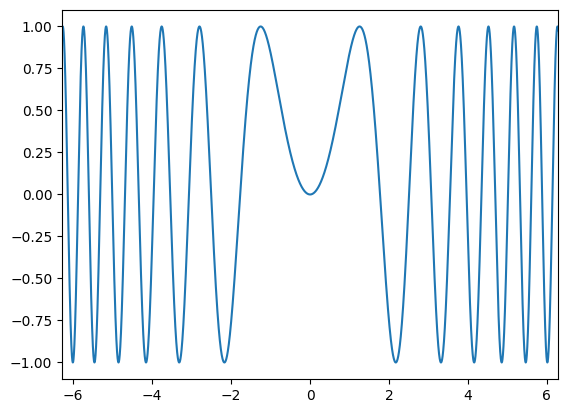

In [201]:
x = symbol('x')
plot(sin(x ** 2), (x, -2 * PI, 2 * PI))

* (дополнительное задание) Проверьте работу функции `plot` на выражении, не содержащем переменной (т.е. на константном выражении), например, на выражении `f = Z(1)`. Исправьте функцию `plot`, чтобы она корректно работала с константными выражениями.

* (дополнительное задание) добавьте в функцию `plot` различные визуальные параметры - цвет кривой, тип кривой, толщина, метка (легенда) и т.д.

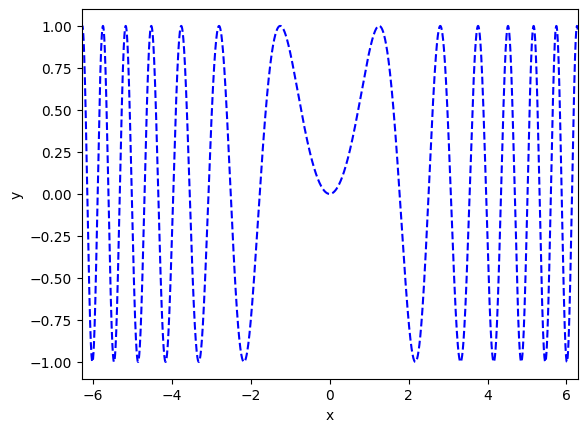

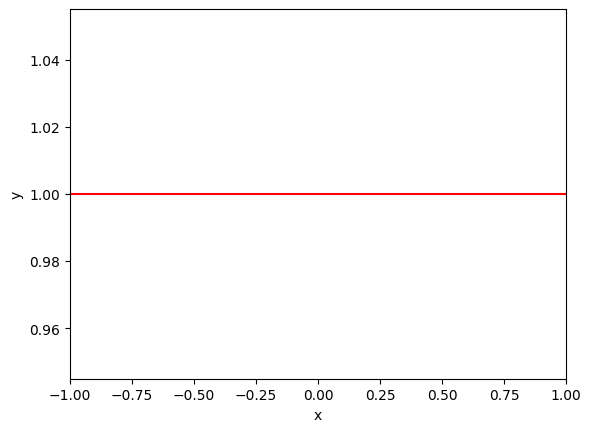

In [204]:
x = symbol('x')

# Пример 1: График синуса
plot(sin(x ** 2), (x, -2 * PI, 2 * PI), color='blue', linestyle='--', label='sin(x^2)')

# Пример 2: Константное выражение
plot(Z(1), (x, -1, 1), color='red', linestyle='-', label='Constant 1')

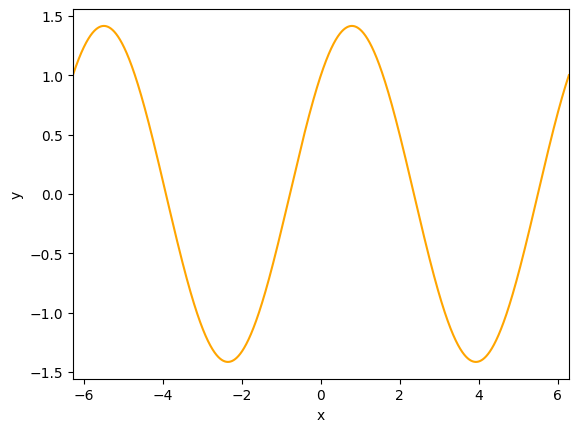

In [205]:
x = symbol('x')

# График функции sin(x) + cos(x)
plot(sin(x) + cos(x), (x, -2 * PI, 2 * PI), color='orange', linestyle='-', label='sin(x) + cos(x)')

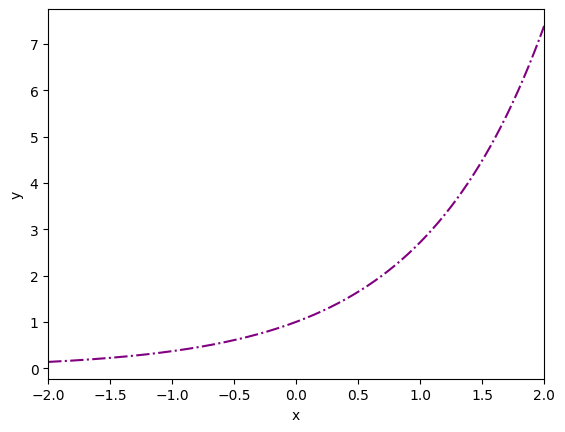

In [196]:
# График функции e^x
plot(exp(x), (x, -2, 2), color='purple', linestyle='-.', label='e^x')

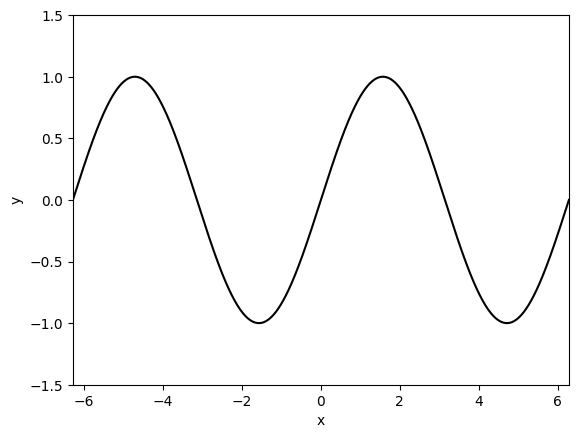

In [198]:
# График функции sin(x) с ограничением по оси y
plot(sin(x), (x, -2 * PI, 2 * PI), ylim=(-1.5, 1.5), color='black', linestyle='-', label='sin(x)')

* Напишите функцию `plot_fam` для построения семейства графиков выражения, зависящего не только от переменной, но и от некоторого параметра. На вход данной функции дополнительно нужно подать кортеж `fam`, состоящий из четырех элементов: символ параметра, нижний предел, верхний предел, шаг.

In [209]:
def plot_fam(y: Expression, x: tuple, fam: tuple, ylim: tuple = (), **kwargs):
    """
    Строит семейство графиков символьного выражения, зависящего от переменной и параметра.

    Аргументы:
    y (Expression): Символьное выражение, зависящее от переменной и параметра.
    x (tuple): Кортеж из трех элементов (переменная, нижний предел, верхний предел).
    fam (tuple): Кортеж из четырех элементов (символ параметра, нижний предел, верхний предел, шаг).
    ylim (tuple): Кортеж из двух элементов (нижний предел по y, верхний предел по y).
    **kwargs: Дополнительные параметры для matplotlib (цвет, тип линии, метка и т.д.).
    """
    # Извлекаем параметры
    var, a, b = x
    param, p_min, p_max, p_step = fam

    # Преобразуем символьные выражения в числа с помощью evalf
    p_min_val = evalf(p_min)
    p_max_val = evalf(p_max)
    p_step_val = evalf(p_step)

    # Генерируем значения параметра
    params = np.arange(p_min_val, p_max_val + p_step_val, p_step_val)

    # Преобразуем выражение в функцию Python
    f = pycode(y, [var, param])

    # Вычисляем пределы по переменной
    x_min, x_max = evalf(a), evalf(b)

    # Сетка по переменной
    X = np.linspace(x_min, x_max, 1000)

    # Устанавливаем пределы по y, если указаны
    if ylim:
        plt.ylim(*ylim)

    # Устанавливаем пределы по x
    plt.xlim(x_min, x_max)

    # Строим семейство графиков
    for p in params:
        Y = f(X, p)  # Значения функции на сетке для текущего параметра
        plt.plot(X, Y, label=f"{param.T[1]['name']} = {p}", **kwargs)

    # Добавляем метки осей
    plt.xlabel(var.T[1]['name'])
    plt.ylabel('y')

    # Добавляем легенду
    plt.legend()

    # Показываем график
    plt.show()

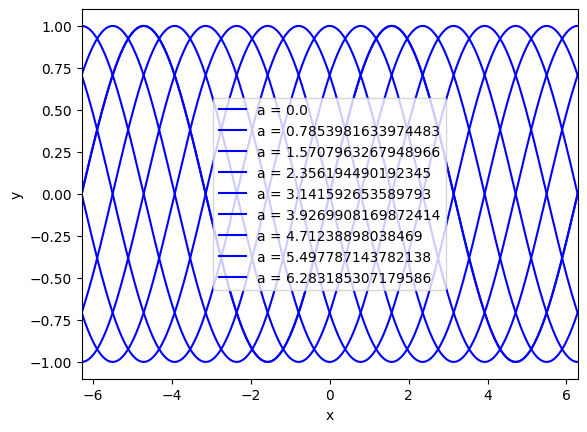

In [210]:
x = symbol('x')
a = symbol('a')

# Выражение, зависящее от переменной x и параметра a
expr = sin(x + a)

# Построение семейства графиков
plot_fam(expr, (x, -2 * PI, 2 * PI), (a, 0, 2 * PI, PI / 4), color='blue', linestyle='-')

* По аналогии с функций `plot` напишете фунцию `parametric_plot` для построения графика функции в параметрической форме и функцию `parametric_plot_fam` для построения семейства графиков функции в параметрической форме (с дополнительным параметром для семейства).

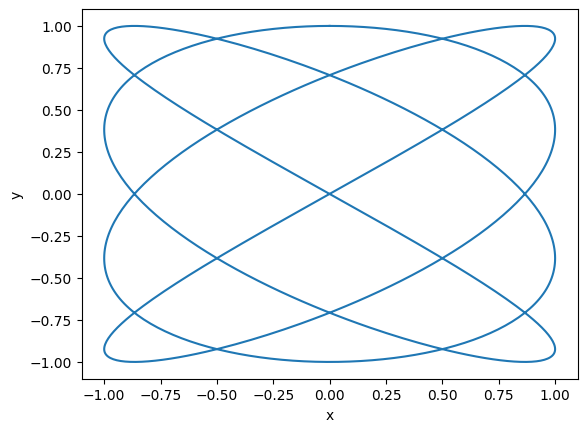

In [212]:
def parametric_plot(f: list, t: tuple, **kwargs):
    """
    Строит график функции в параметрической форме.

    Аргументы:
    f (list): Список из двух выражений [x(t), y(t)], где x(t) и y(t) зависят от параметра t.
    t (tuple): Кортеж из трех элементов (параметр t, нижний предел, верхний предел).
    **kwargs: Дополнительные параметры для matplotlib (цвет, тип линии, метка и т.д.).
    """
    # Извлекаем параметры
    param, t_min, t_max = t

    # Преобразуем выражения в функции Python
    x_func = pycode(f[0], [param])
    y_func = pycode(f[1], [param])

    # Вычисляем пределы параметра
    t_min_val = evalf(t_min)
    t_max_val = evalf(t_max)

    # Генерируем сетку по параметру t
    T = np.linspace(t_min_val, t_max_val, 1000)

    # Вычисляем значения x и y
    X = x_func(T)
    Y = y_func(T)

    # Строим график
    plt.plot(X, Y, **kwargs)

    # Добавляем метки осей
    plt.xlabel('x')
    plt.ylabel('y')

    # Показываем график
    plt.show()

t = symbol('t')
parametric_plot([sin(2 * t), sin(PI / 2 + 3 * t/ 2 )], (t, 0, 4 * PI))

* (дополнительное задание) Напишите функцию построения графика семейства параметрически заданных кривых.

In [218]:
from matplotlib.cm import get_cmap

def parametric_plot_fam(x_expr: Expression, y_expr: Expression, t: tuple, fam: tuple, **kwargs):
    """
    Строит семейство параметрически заданных кривых с разными цветами.

    Аргументы:
    x_expr (Expression): Выражение для координаты x, зависящее от параметра t и параметра семейства a.
    y_expr (Expression): Выражение для координаты y, зависящее от параметра t и параметра семейства a.
    t (tuple): Кортеж из трех элементов (параметр t, нижний предел, верхний предел).
    fam (tuple): Кортеж из четырех элементов (параметр семейства a, нижний предел, верхний предел, шаг).
    **kwargs: Дополнительные параметры для matplotlib (цвет, тип линии, метка и т.д.).
    """
    # Извлекаем параметры
    param_t, t_min, t_max = t
    param_a, a_min, a_max, a_step = fam

    # Преобразуем выражения в функции Python
    x_func = pycode(x_expr, [param_t, param_a])
    y_func = pycode(y_expr, [param_t, param_a])

    # Вычисляем пределы параметра t
    t_min_val = evalf(t_min)
    t_max_val = evalf(t_max)

    # Генерируем сетку по параметру t
    T = np.linspace(t_min_val, t_max_val, 1000)

    # Вычисляем пределы параметра семейства a
    a_min_val = evalf(a_min)
    a_max_val = evalf(a_max)
    a_step_val = evalf(a_step)

    # Генерируем значения параметра семейства a
    A = np.arange(a_min_val, a_max_val + a_step_val, a_step_val)

    # Используем цветовую карту для генерации цветов
    cmap = get_cmap('viridis')  # Выбираем цветовую карту (например, 'viridis', 'plasma', 'coolwarm' и т.д.)
    num_plots = len(A)
    colors = cmap(np.linspace(0, 1, num_plots))  # Генерируем цвета для каждого графика

    # Строим семейство графиков с разными цветами
    for i, a in enumerate(A):
        X = x_func(T, a)  # Значения x для текущего параметра a
        Y = y_func(T, a)  # Значения y для текущего параметра a
        plt.plot(X, Y, label=f"{param_a.T[1]['name']} = {a}", color=colors[i], **kwargs)

    # Добавляем метки осей
    plt.xlabel('x')
    plt.ylabel('y')

    # Добавляем легенду
    plt.legend()

    # Показываем график
    plt.show()

C:\Users\rbany\AppData\Local\Temp\ipykernel_14840\3567659464.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('viridis')  # Выбираем цветовую карту (например, 'viridis', 'plasma', 'coolwarm' и т.д.)


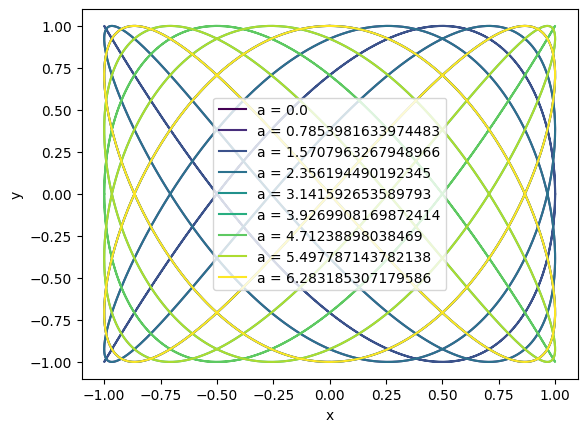

In [220]:
t = symbol('t')
a = symbol('a')

# Выражения для x(t, a) и y(t, a)
x_expr = sin(2 * t + a)
y_expr = cos(3 * t + a)

# Построение семейства графиков
parametric_plot_fam(x_expr, y_expr, (t, 0, 2 * PI), (a, 0, 2 * PI, PI / 4), linestyle='-')

* (дополнительное задание) Напишите функцию построения графиков в полярной системе координат.

In [226]:
def polar_plot(R: Expression, phi: tuple, **kwargs):
    """
    Строит график в полярной системе координат.

    Аргументы:
    R (Expression): Выражение для радиуса R, зависящее от угла phi.
    phi (tuple): Кортеж из трех элементов (угол phi, нижний предел, верхний предел).
    **kwargs: Дополнительные параметры для matplotlib (цвет, тип линии, метка и т.д.).
    """
    # Извлекаем параметры
    param_phi, phi_min, phi_max = phi

    # Преобразуем выражение для радиуса в функцию Python
    R_func = pycode(R, [param_phi])

    # Вычисляем пределы угла phi
    phi_min_val = evalf(phi_min)
    phi_max_val = evalf(phi_max)

    # Генерируем сетку по углу phi
    PHI = np.linspace(phi_min_val, phi_max_val, 1000)

    # Вычисляем значения радиуса R
    R_vals = R_func(PHI)

    # Преобразуем полярные координаты в декартовы
    X = R_vals * np.cos(PHI)
    Y = R_vals * np.sin(PHI)

    # Строим график в полярной системе координат
    plt.figure(figsize=(6, 6))  # Устанавливаем размер фигуры
    plt.plot(X, Y, **kwargs)

    # Добавляем метки осей
    plt.xlabel('x')
    plt.ylabel('y')

    # Устанавливаем одинаковый масштаб для осей
    plt.gca().set_aspect('equal')

    # Показываем график
    plt.show()

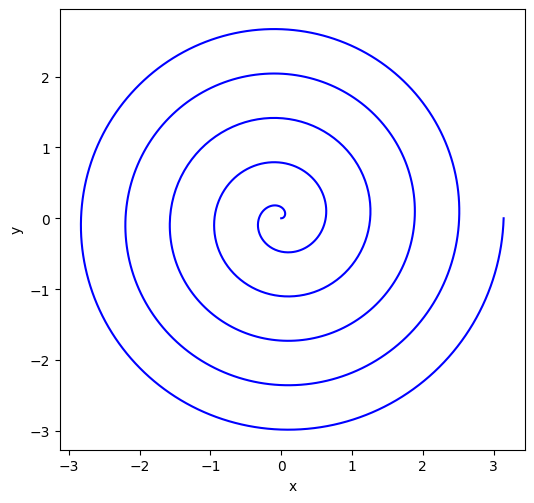

In [227]:
r, alpha = symbol('r'), symbol('alpha')
polar_plot(alpha / 10, (alpha, 0, 10 * PI), color='blue', linestyle='-')

* Для построения графиков неявно заданных функций можно использовать функцию построения контурных графиков пакета `matplotlib`. Функция в этом случае задается равенством (см. пример ниже), преобразуем это равенство в разность левой и правой части и строим линии уровня (контур) для нулевого значения этой разности:
$$L(x) = R(x) \,\to\, F(x) = L(x) - R(x) \,\to\, F(x) = 0.$$  
На вход функции `implicit_plot` должны подаваться два кортежа для обеих переменных (и имени функции, и имени переменной).

In [222]:
def implicit_plot(f: Expression, x: tuple, y: tuple):
  lhs, rhs = Expression((f.T)[1]), Expression((f.T)[2]),
  F = pycode(lhs - rhs, [x[0], y[0]])
  # формируем две сетки по осям
  xgrid = np.linspace(evalf(x[1]), evalf(x[2]), 100)
  ygrid = np.linspace(evalf(y[1]), evalf(y[2]), 100)
  # преобазуем эти сетки в двумерную сетку
  X, Y = np.meshgrid(xgrid, ygrid)
  # вычисляем функцию
  Z = F(X, Y)
  # задаем одинаковый масштаб по осям
  plt.gca().set_aspect('equal')
  # строим один контур для значения F = 0.0
  plt.contour(X, Y, Z, [0.0])

* Проверяем:

<IPython.core.display.Math object>

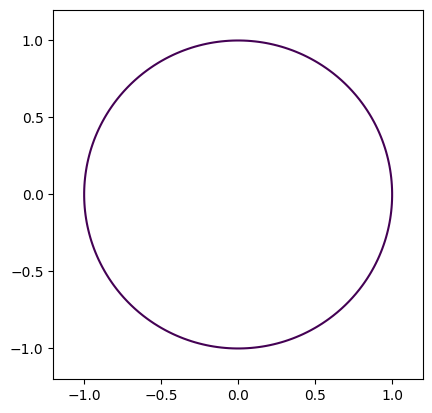

In [223]:
x, y = symbol('x'), symbol('y')
f = x ** 2 + y ** 2 == 1
show(f)
a = 1.2
implicit_plot(f, (x, -a, a), (y, -a, a))

* (дополнительное задание) Напишите функцию построения семейства неявно заданных функций

In [228]:
def implicit_plot_fam(f: Expression, x: tuple, y: tuple, fam: tuple, **kwargs):
    """
    Строит семейство неявно заданных функций.

    Аргументы:
    f (Expression): Выражение, задающее неявную функцию, зависящую от x, y и параметра семейства a.
    x (tuple): Кортеж из трех элементов (переменная x, нижний предел, верхний предел).
    y (tuple): Кортеж из трех элементов (переменная y, нижний предел, верхний предел).
    fam (tuple): Кортеж из четырех элементов (параметр семейства a, нижний предел, верхний предел, шаг).
    **kwargs: Дополнительные параметры для matplotlib (цвет, тип линии, метка и т.д.).
    """
    # Извлекаем параметры
    var_x, x_min, x_max = x
    var_y, y_min, y_max = y
    param_a, a_min, a_max, a_step = fam

    # Преобразуем выражение в функцию Python
    lhs, rhs = Expression((f.T)[1]), Expression((f.T)[2])
    F = pycode(lhs - rhs, [var_x, var_y, param_a])

    # Вычисляем пределы переменных и параметра
    x_min_val = evalf(x_min)
    x_max_val = evalf(x_max)
    y_min_val = evalf(y_min)
    y_max_val = evalf(y_max)
    a_min_val = evalf(a_min)
    a_max_val = evalf(a_max)
    a_step_val = evalf(a_step)

    # Генерируем сетки по переменным x и y
    xgrid = np.linspace(x_min_val, x_max_val, 100)
    ygrid = np.linspace(y_min_val, y_max_val, 100)
    X, Y = np.meshgrid(xgrid, ygrid)

    # Генерируем значения параметра семейства a
    A = np.arange(a_min_val, a_max_val + a_step_val, a_step_val)

    # Строим семейство графиков
    for a in A:
        # Вычисляем функцию для текущего значения параметра a
        Z = F(X, Y, a)

        # Строим контур для значения F = 0.0
        plt.contour(X, Y, Z, [0.0], **kwargs)

    # Устанавливаем одинаковый масштаб по осям
    plt.gca().set_aspect('equal')

    # Добавляем метки осей
    plt.xlabel(var_x.T[1]['name'])
    plt.ylabel(var_y.T[1]['name'])

    # Показываем график
    plt.show()

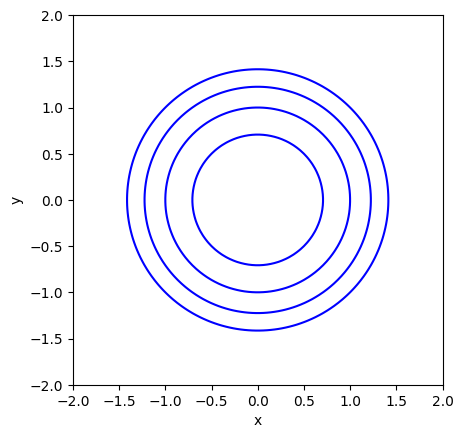

In [229]:
x, y, a = symbol('x'), symbol('y'), symbol('a')

# Выражение для неявной функции
f = x ** 2 + y ** 2 == a

# Построение семейства графиков
implicit_plot_fam(f, (x, -2, 2), (y, -2, 2), (a, 0.5, 2, 0.5), colors='blue', linestyles='-')

* Графики функций двух переменных (т.е. поверхности) можно строить с помощью функции `plot_surface` пакета `matplotlib`. В остальном схема работы функции
`surface_plot` аналогична предыдущей функции `implicit_plot`.

In [224]:
# пакет для трехмерной графики
from mpl_toolkits import mplot3d

def surface_plot(z: Expression, x: tuple, y: tuple):
  xgrid = np.linspace(evalf(x[1]), evalf(x[2]), 100)
  ygrid = np.linspace(evalf(y[1]), evalf(y[2]), 100)

  X, Y = np.meshgrid(xgrid, ygrid)
  f = pycode(z, [x[0], y[0]])
  Z = f(X, Y)

  fig = plt.figure(figsize = (6, 5))
  ax = plt.axes(projection='3d')
  ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap = plt.cm.autumn, linewidth=0)


* Проверяем:

<IPython.core.display.Math object>

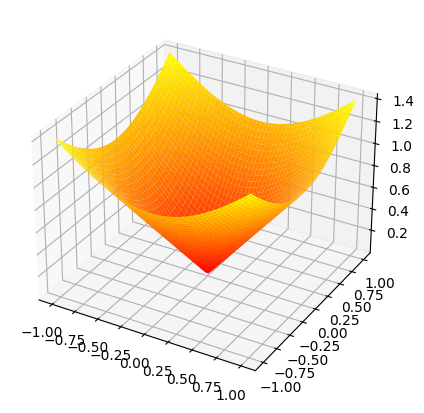

In [225]:
x, y = symbol('x'), symbol('y')
f = (x ** 2 + y ** 2) ** Q(1, 2)
show(f)
surface_plot(f, (x, -1, 1), (y, -1, 1))

* (дополнительное задание) По аналогии с последними двумя функциями напишите функцию `contour_plot` построения линий уровня (контуров) заданной функции двух переменных.

In [234]:
def contour_plot(z: Expression, x: tuple, y: tuple, levels: list = None, **kwargs):
    """
    Строит линии уровня (контуры) заданной функции двух переменных с использованием трехмерной графики.

    Аргументы:
    z (Expression): Выражение для функции двух переменных, зависящее от x и y.
    x (tuple): Кортеж из трех элементов (переменная x, нижний предел, верхний предел).
    y (tuple): Кортеж из трех элементов (переменная y, нижний предел, верхний предел).
    levels (list): Список значений уровней для построения контуров (по умолчанию автоматически определяется).
    **kwargs: Дополнительные параметры для matplotlib (цвет, стиль линии, метка и т.д.).
    """
    # Извлекаем параметры
    var_x, x_min, x_max = x
    var_y, y_min, y_max = y

    # Преобразуем выражение в функцию Python
    f = pycode(z, [var_x, var_y])

    # Вычисляем пределы переменных
    x_min_val = evalf(x_min)
    x_max_val = evalf(x_max)
    y_min_val = evalf(y_min)
    y_max_val = evalf(y_max)

    # Генерируем сетки по переменным x и y
    xgrid = np.linspace(x_min_val, x_max_val, 100)
    ygrid = np.linspace(y_min_val, y_max_val, 100)
    X, Y = np.meshgrid(xgrid, ygrid)

    # Вычисляем значения функции на сетке
    Z = f(X, Y)

    # Создаем фигуру и оси для трехмерной графики
    fig = plt.figure(figsize=(8, 6))
    ax = plt.axes(projection='3d')

    # Строим поверхность функции
    ax.plot_surface(X, Y, Z, rstride=2, cstride=2, alpha=0.5, cmap='viridis', linewidth=0)

    # Строим линии уровня на правильной высоте
    if levels is None:
        levels = np.linspace(Z.min(), Z.max(), 10)  # Автоматически определяем уровни
    for level in levels:
        ax.contour(X, Y, Z, levels=[level], zdir='z', offset=level, colors='red', linestyles='solid')

    # Настройка осей
    ax.set_xlabel(var_x.T[1]['name'])
    ax.set_ylabel(var_y.T[1]['name'])
    ax.set_zlabel('z')

    # Устанавливаем одинаковый масштаб по осям
    ax.set_box_aspect([1, 1, 1])

    # Показываем график
    plt.show()

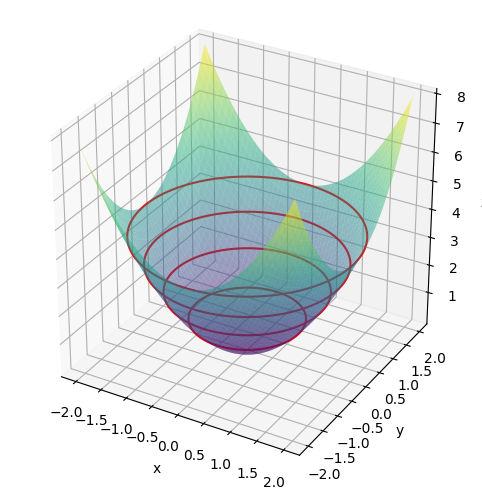

In [235]:
x, y = symbol('x'), symbol('y')

# Выражение для функции двух переменных
f = x ** 2 + y ** 2

# Построение линий уровня с использованием трехмерной графики
contour_plot(f, (x, -2, 2), (y, -2, 2), levels=[1, 2, 3, 4])

***

# Заголовок 1

## Заголовок 2

### Заголовок 3

#### Заголовок 4

##### Заголовок 5

###### Заголовок 6